<a href="https://colab.research.google.com/github/Sha4719/Capstone-Project-Customer-Personality-Segmentation/blob/main/Learner_Notebook_Full_Code_Version_Customer_Personality_Segmentation_FP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**


---

#### **Business Context**  
Understanding customer personality and behavior is pivotal for businesses to enhance customer satisfaction and increase revenue. Segmentation based on a customer's personality, demographics, and purchasing behavior allows companies to create tailored marketing campaigns, improve customer retention, and optimize product offerings.  

A leading retail company with a rapidly growing customer base seeks to gain deeper insights into their customers' profiles. The company recognizes that understanding customer personalities, lifestyles, and purchasing habits can unlock significant opportunities for personalizing marketing strategies and creating loyalty programs. These insights can help address critical business challenges, such as improving the effectiveness of marketing campaigns, identifying high-value customer groups, and fostering long-term relationships with customers.  

With the competition intensifying in the retail space, moving away from generic strategies to more targeted and personalized approaches is essential for sustaining a competitive edge.  

---

#### **Objective**  
In an effort to optimize marketing efficiency and enhance customer experience, the company has embarked on a mission to identify distinct customer segments. By understanding the characteristics, preferences, and behaviors of each group, the company aims to:  
1. Develop personalized marketing campaigns to increase conversion rates.  
2. Create effective retention strategies for high-value customers.  
3. Optimize resource allocation, such as inventory management, pricing strategies, and store layouts.  

As a data scientist tasked with this project, your responsibility is to analyze the given customer data, apply machine learning techniques to segment the customer base, and provide actionable insights into the characteristics of each segment.  

---

#### **Data Dictionary**  
The dataset includes historical data on customer demographics, personality traits, and purchasing behaviors. Key attributes are:  

1. **Customer Information**  
   - **ID:** Unique identifier for each customer.  
   - **Year_Birth:** Customer's year of birth.  
   - **Education:** Education level of the customer.  
   - **Marital_Status:** Marital status of the customer.  
   - **Income:** Yearly household income (in dollars).  
   - **Kidhome:** Number of children in the household.  
   - **Teenhome:** Number of teenagers in the household.  
   - **Dt_Customer:** Date when the customer enrolled with the company.  
   - **Recency:** Number of days since the customer’s last purchase.  
   - **Complain:** Whether the customer complained in the last 2 years (1 for yes, 0 for no).  

2. **Spending Information (Last 2 Years)**  
   - **MntWines:** Amount spent on wine.  
   - **MntFruits:** Amount spent on fruits.  
   - **MntMeatProducts:** Amount spent on meat.  
   - **MntFishProducts:** Amount spent on fish.  
   - **MntSweetProducts:** Amount spent on sweets.  
   - **MntGoldProds:** Amount spent on gold products.  

3. **Purchase and Campaign Interaction**  
   - **NumDealsPurchases:** Number of purchases made using a discount.  
   - **AcceptedCmp1:** Response to the 1st campaign (1 for yes, 0 for no).  
   - **AcceptedCmp2:** Response to the 2nd campaign (1 for yes, 0 for no).  
   - **AcceptedCmp3:** Response to the 3rd campaign (1 for yes, 0 for no).  
   - **AcceptedCmp4:** Response to the 4th campaign (1 for yes, 0 for no).  
   - **AcceptedCmp5:** Response to the 5th campaign (1 for yes, 0 for no).  
   - **Response:** Response to the last campaign (1 for yes, 0 for no).  

4. **Shopping Behavior**  
   - **NumWebPurchases:** Number of purchases made through the company’s website.  
   - **NumCatalogPurchases:** Number of purchases made using catalogs.  
   - **NumStorePurchases:** Number of purchases made directly in stores.  
   - **NumWebVisitsMonth:** Number of visits to the company’s website in the last month.  

# **Let's start coding!**

## **Importing necessary libraries**

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

## **Loading the data**

In [2]:
# uncomment and run the following line if using Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# loading data into a pandas dataframe
df = pd.read_csv("/content/Customer_Personality_Segmentation.csv", sep="\t")

## **Data Overview**

#### **Question 1**: What are the data types of all the columns?

In [4]:
# Run the attribute .dtype to retrieve the data types of all columns
df.dtypes

,0
ID,int64
Year_Birth,int64
Education,object
Marital_Status,object
Income,float64
Kidhome,int64
Teenhome,int64
Dt_Customer,object
Recency,int64
MntWines,int64


In [5]:
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


* **I want to get an idea of what information is presented in the dataset by using .head().**

In [6]:
# This attribute will tell me how many columns and rows are in this dataset
df.shape

(2240, 29)

* **There are 2,240 rows and 29 columns.**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

##### **Observations:**

* Out of the 29 columns, 3 are objects, 1 is a float, and the remainder are ints.

#### **Question 2:** Check the statistical summary of the data. What is the average household income?

* **First, I would like to rename, rearrange, merge, and drop several columns to facilitate the EDA that's to follow.**

In [8]:
df.drop('ID', axis=1, inplace=False)
df.drop('Z_CostContact', axis=1, inplace=True)
df.drop('Z_Revenue', axis=1, inplace=True)

In [9]:
df['Age'] = 2025 - df['Year_Birth']
df.drop('Year_Birth', axis=1, inplace=True)

* **I want to change and drop the 'Year_Birth' column to 'Age' to eliminate me manually calculating the customers' ages.**

In [10]:
df=df[['Age'] + [col for col in df.columns if col != 'Age']]

In [11]:
cols=list(df.columns)
cols.remove('Age')
cols.insert(1, 'Age')
df=df[cols]

In [12]:
# Convert 'Dt_Customer' to datetime objects
# The original format was '%m-%d-%Y' which was incorrect
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

# Extract the year and calculate 'Years_Enrolled' (TypeError Suggestion)
df['Years_Enrolled'] = 2025 - df['Dt_Customer'].dt.year

In [13]:
df=df[['Years_Enrolled'] + [col for col in df.columns if col != 'Years_Enrolled']]

In [14]:
df.drop('Dt_Customer', axis=1, inplace=True)

In [15]:
df.drop('ID', axis=1, inplace=True) # dropping 'ID' column

In [16]:
cols=list(df.columns)
cols.remove('Years_Enrolled')
cols.insert(1, 'Years_Enrolled')
df=df[cols]

In [17]:
df['Total_Children'] = df['Kidhome'] + df['Teenhome']
df.drop(['Kidhome', 'Teenhome'], axis=1, inplace=True)

In [18]:
cols=list(df.columns)
cols.remove('Total_Children')
cols.insert(5, 'Total_Children')
df=df[cols]

In [19]:
df['Total_Expenditure'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
cols=list(df.columns)
cols.remove('Total_Expenditure')
cols.insert(13, 'Total_Expenditure')
df=df[cols]

* **I'm creating a new column for the 'Spending Information' in the dataset.**

In [20]:
print(df['Education'].value_counts())

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64


In [21]:
df['Education'] = df['Education'].replace({'2n Cycle': 'Master'})

print(df['Education'].value_counts())

Education
Graduation    1127
Master         573
PhD            486
Basic           54
Name: count, dtype: int64


* **It's noted that the variables '2n Cycle' and 'Master' can be interchangeable terms, so merging the two would eliminate unnecessary additional columns to evaluate.**

In [22]:
# I'm checking the statistical summary of the data by using the .describe() method
df.describe()

,Age,Years_Enrolled,Income,Total_Children,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Expenditure,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,56.194196,11.971875,52247.251354,0.950446,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,605.798214,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107
std,11.984069,0.684554,25173.076661,0.751803,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,602.249288,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274
min,29.000000,11.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,12.000000,35303.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,68.750000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,12.000000,51381.500000,1.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,396.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,66.000000,12.000000,68522.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,1045.500000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,132.000000,13.000000,666666.000000,3.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,2525.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
# I transposed the output to present a visually easier dataset to read
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2240.0,56.194196,11.984069,29.0,48.00,55.0,66.00,132.0
Years_Enrolled,2240.0,11.971875,0.684554,11.0,12.00,12.0,12.00,13.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Total_Children,2240.0,0.950446,0.751803,0.0,0.00,1.0,1.00,3.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0
MntSweetProducts,2240.0,27.062946,41.280498,0.0,1.00,8.0,33.00,263.0


* **The average household income is 52247.25, according to the data. Another way to check this is using the .mean() method.**

In [24]:
# an alternate way of checking for the 'average'
average = np.mean(df['Income'])
print(f"The average household income is {average}")

The average household income is 52247.25135379061


##### **Observations:**

* In the count column, it shows that 24 values are missing from the total of 2240.

* Based on the previous observation, the average might not be a true representation of the mean in the feature 'Income' due to the missing values ***(if possible, have to later figure out why those values are missing and if it's worth dropping from the dataset or choosing a different method to better represent the customers)***.

#### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [25]:
df.isnull().sum().sum()

24

In [26]:
missing_values = df.isnull().any(axis=1)
df[missing_values]

,Age,Years_Enrolled,Education,Marital_Status,Income,Total_Children,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Expenditure,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
10,42,12,Graduation,Married,NaN,1,11,5,5,6,0,2,1,19,1,1,0,2,7,0,0,0,0,0,0,0
27,39,12,Graduation,Single,NaN,1,19,5,1,3,3,263,362,637,0,27,0,0,1,0,0,0,0,0,0,0
43,66,12,PhD,Single,NaN,0,80,81,11,50,3,2,39,186,1,1,3,4,2,0,0,0,0,0,0,0
48,74,11,Graduation,Single,NaN,3,96,48,5,48,6,10,7,124,3,2,1,4,6,0,0,0,0,0,0,0
58,43,12,Graduation,Single,NaN,1,57,11,3,22,2,2,6,46,2,2,0,3,6,0,0,0,0,0,0,0
71,52,13,Master,Married,NaN,1,25,25,3,43,17,4,17,109,3,3,0,3,8,0,0,0,0,0,0,0
90,68,13,PhD,Married,NaN,3,4,230,42,192,49,37,53,603,12,7,2,8,9,0,0,0,0,0,0,0
91,68,11,Graduation,Single,NaN,2,45,7,0,8,2,0,1,18,1,1,0,2,7,0,0,0,0,0,0,0
92,52,12,Master,Together,NaN,0,87,445,37,359,98,28,18,985,1,2,4,8,1,0,0,0,0,0,0,0
128,64,12,PhD,Married,NaN,1,23,352,0,27,10,0,15,404,3,6,1,7,6,0,0,0,0,0,0,0


* **I want to retrieve a subset focusing only on the missing values and the corresponding columns to help guide my next decision.**

In [27]:
# I want to make a copy of the original dataset before I apply .inplace=True
df = df.copy()

# I want to fill in the NaN values with median so it won't misinterpret the
# information during the clustering and visualization prcoess
df['Income'] = df['Income'].fillna(df['Income'].median())


In [28]:
df.isnull().sum().sum()

0

* **There are now no missing values within the dataset.**

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  2240 non-null   int64  
 1   Years_Enrolled       2240 non-null   int32  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Total_Children       2240 non-null   int64  
 6   Recency              2240 non-null   int64  
 7   MntWines             2240 non-null   int64  
 8   MntFruits            2240 non-null   int64  
 9   MntMeatProducts      2240 non-null   int64  
 10  MntFishProducts      2240 non-null   int64  
 11  MntSweetProducts     2240 non-null   int64  
 12  MntGoldProds         2240 non-null   int64  
 13  Total_Expenditure    2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

##### **Observations:**

* Initially, the output confirmed that the dataset's column ***'Income'*** contained **24** missing values.

* I had thought about replacing the missing values with '0' as I was determining what could be the cause of the missing income (possibilities could be single house income w/o a joint tax return document; stay-at-home parent; etc.).

* I settled on replacing the NaN values with the median to avoid causing confusion or distortion in the clustering and visualization process.

* **I will now update the original dataset with the changes I made within the copy.**

In [30]:
df.update(df.copy())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  2240 non-null   int64  
 1   Years_Enrolled       2240 non-null   int32  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Total_Children       2240 non-null   int64  
 6   Recency              2240 non-null   int64  
 7   MntWines             2240 non-null   int64  
 8   MntFruits            2240 non-null   int64  
 9   MntMeatProducts      2240 non-null   int64  
 10  MntFishProducts      2240 non-null   int64  
 11  MntSweetProducts     2240 non-null   int64  
 12  MntGoldProds         2240 non-null   int64  
 13  Total_Expenditure    2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

#### **Question 4**: Are there any duplicates in the data?

In [31]:
df.duplicated().sum()

182

In [32]:
# Due to dropping the 'ID' column earlier
# I would have to create a subset of columns
# to further investigate the duplicates
subset_columns = ['Age', 'Education', 'Marital_Status', 'Income', 'Total_Children']

partial_duplicates = df[df.duplicated(subset=subset_columns, keep=False)]

print(partial_duplicates.sort_values(by=subset_columns))


      Age  Years_Enrolled   Education Marital_Status   Income  Total_Children  \
696    30              11  Graduation         Single  34824.0               0   
995    30              11  Graduation         Single  34824.0               0   
392    32              11  Graduation         Single  74293.0               0   
928    32              11  Graduation         Single  74293.0               0   
508    33              12  Graduation        Married  34935.0               0   
...   ...             ...         ...            ...      ...             ...   
1570   79              13         PhD         Single  82800.0               0   
1487   79              11         PhD       Together  64014.0               3   
2236   79              11         PhD       Together  64014.0               3   
39     82              12         PhD       Divorced  48948.0               0   
894    82              12         PhD       Divorced  48948.0               0   

      Recency  MntWines  Mn

In [33]:
# Since the duplicate data points are identical with no slight variance
# I will just eliminate one out of the two matches (keeping the first)
df = df.drop_duplicates(subset=subset_columns, keep='first')

In [34]:
df.duplicated().sum()

0

##### **Observations:**

* **There are now no duplicates discovered in this dataset.**

## **Exploratory Data Analysis**

### Univariate Analysis

#### **Question 5:** Explore all the variables and provide observations on their distributions. (histograms and boxplots)

In [35]:
df.head()

,Age,Years_Enrolled,Education,Marital_Status,Income,Total_Children,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Expenditure,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,68,13,Graduation,Single,58138.0,0,58,635,88,546,172,88,88,1617,3,8,10,4,7,0,0,0,0,0,0,1
1,71,11,Graduation,Single,46344.0,2,38,11,1,6,2,1,6,27,2,1,1,2,5,0,0,0,0,0,0,0
2,60,12,Graduation,Together,71613.0,0,26,426,49,127,111,21,42,776,1,8,2,10,4,0,0,0,0,0,0,0
3,41,11,Graduation,Together,26646.0,1,26,11,4,20,10,3,5,53,2,2,0,4,6,0,0,0,0,0,0,0
4,44,11,PhD,Married,58293.0,1,94,173,43,118,46,27,15,422,5,5,3,6,5,0,0,0,0,0,0,0


In [36]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
numeric_columns

Index(['Age', 'Income', 'Total_Children', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'Total_Expenditure', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

In [37]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['Education', 'Marital_Status'], dtype='object')

In [38]:
print(df[numeric_columns].describe().T)

                      count          mean           std     min      25%  \
Age                  2039.0     56.231976     11.983086    29.0     48.0   
Income               2039.0  52350.475233  25429.826617  1730.0  35702.5   
Total_Children       2039.0      0.952428      0.748694     0.0      0.0   
Recency              2039.0     49.096616     28.974507     0.0     24.0   
MntWines             2039.0    303.332026    335.823263     0.0     23.0   
MntFruits            2039.0     26.351153     39.824028     0.0      2.0   
MntMeatProducts      2039.0    167.755272    227.930430     0.0     16.0   
MntFishProducts      2039.0     37.456596     54.704882     0.0      3.0   
MntSweetProducts     2039.0     27.215792     41.701678     0.0      1.0   
MntGoldProds         2039.0     43.760177     52.024687     0.0      9.0   
Total_Expenditure    2039.0    605.871015    602.092007     5.0     68.5   
NumDealsPurchases    2039.0      2.329083      1.934170     0.0      1.0   
NumWebPurcha

In [39]:
# I want to further explore the extreme outliers in 'Age' and 'Income'
# before plotting the data
df[df['Age'] > 80]

,Age,Years_Enrolled,Education,Marital_Status,Income,Total_Children,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Expenditure,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
39,82,12,PhD,Divorced,48948.0,0,53,437,8,206,160,49,42,902,2,7,10,5,6,1,0,0,0,0,0,1
192,125,12,Master,Divorced,36640.0,1,99,15,6,8,7,4,25,65,1,2,1,2,5,0,0,0,0,0,1,0
239,132,11,Master,Single,60182.0,1,23,8,0,5,7,0,2,22,1,1,0,2,4,0,0,0,0,0,0,0
339,126,12,PhD,Together,83532.0,0,36,755,144,562,104,64,224,1853,1,4,6,4,1,0,0,1,0,0,0,0
358,82,12,Master,Married,65073.0,0,65,629,17,177,69,0,8,900,1,5,3,5,2,0,0,0,0,0,1,0
415,82,11,PhD,Married,75865.0,0,73,483,0,591,156,0,12,1242,1,3,5,10,1,0,0,0,0,0,0,0
424,84,12,PhD,Married,93027.0,0,77,1285,42,716,55,0,21,2119,0,7,10,5,2,0,0,1,0,0,0,0
494,81,12,PhD,Divorced,55614.0,0,85,504,13,131,8,0,26,682,1,9,4,6,7,0,1,0,0,0,0,0
499,81,12,Graduation,Married,65275.0,0,9,388,14,218,91,14,21,746,1,4,3,13,2,0,0,0,0,0,0,0
519,81,11,Master,Married,80184.0,0,19,1035,134,670,25,38,0,1902,1,6,3,10,3,0,0,1,1,0,0,0


In [40]:
df[df['Income'] > 100000]

,Age,Years_Enrolled,Education,Marital_Status,Income,Total_Children,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Expenditure,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
124,42,12,Graduation,Single,101970.0,0,69,722,27,102,44,72,168,1135,0,6,8,13,2,0,1,1,1,0,0,1
164,52,11,PhD,Married,157243.0,1,98,20,2,1582,1,2,1,1608,15,0,22,0,0,0,0,0,0,0,0,0
203,48,13,PhD,Together,102160.0,0,54,763,29,138,76,176,58,1240,0,7,9,10,4,0,1,1,1,0,0,1
252,51,12,Graduation,Divorced,102692.0,0,5,168,148,444,32,172,148,1112,1,6,9,13,2,0,1,1,1,1,0,1
617,49,12,PhD,Together,162397.0,2,31,85,1,16,2,1,2,107,0,0,0,1,1,0,0,0,0,0,0,0
646,55,12,Graduation,Together,105471.0,0,36,1009,181,104,202,21,207,1724,0,9,8,13,3,0,0,1,1,0,0,1
655,50,11,Graduation,Divorced,153924.0,0,81,1,1,1,1,1,1,6,0,0,0,0,0,0,0,0,0,0,0,0
687,43,13,PhD,Married,160803.0,0,21,55,16,1622,17,3,4,1717,15,0,28,1,0,0,0,0,0,0,0,0
1300,54,12,Master,Together,157733.0,1,37,39,1,9,2,0,8,59,0,1,0,1,1,0,0,0,0,0,0,0
1653,48,12,Graduation,Together,157146.0,0,13,1,0,1725,2,1,1,1730,0,0,28,0,1,0,0,0,0,0,0,0


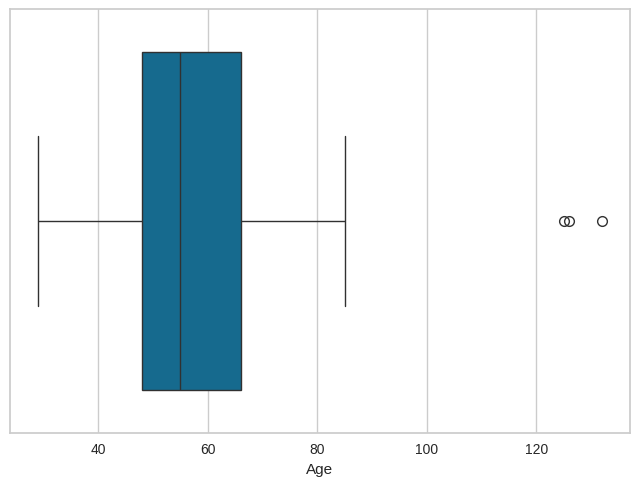

In [41]:
sns.boxplot(data=df, x='Age');

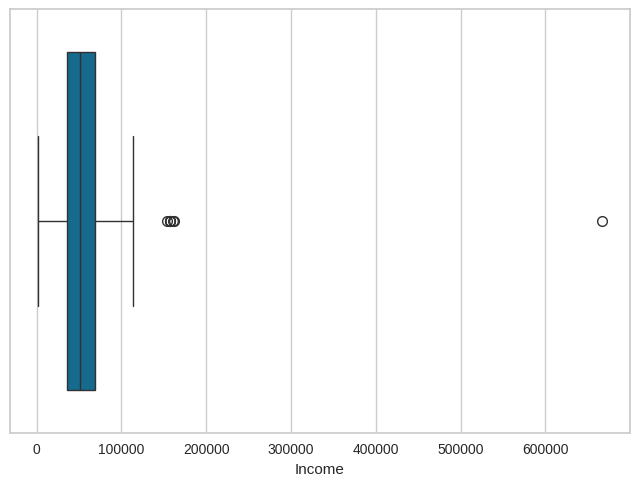

In [42]:
sns.boxplot(data=df, x='Income');

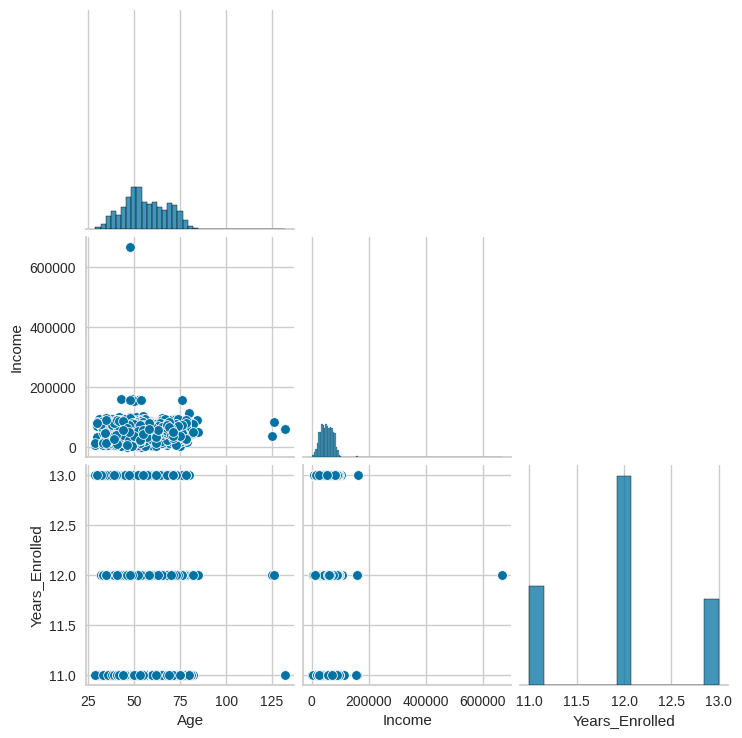

In [43]:
sns.pairplot(data=df[['Age', 'Income', 'Years_Enrolled']], corner=True)
plt.show()

* **Income distribution is right-skewed.**

* **It's strange for customers who are above 100 years of age, yet the recency and years enrolled are not off in their own respects. This particular population shows inconsistencies (personally does not warrant any further investigation), and I will solely deem them as outliers (including outlier in the 'Income' column).**

* **Based on the output within the 'Age' and 'Income' columns, I will drop those outliers before moving on.**

In [44]:
df.drop(df[df['Age'] > 100].index, inplace=True)

In [45]:
df.drop(df[df['Income'] > 200000].index, inplace=True)

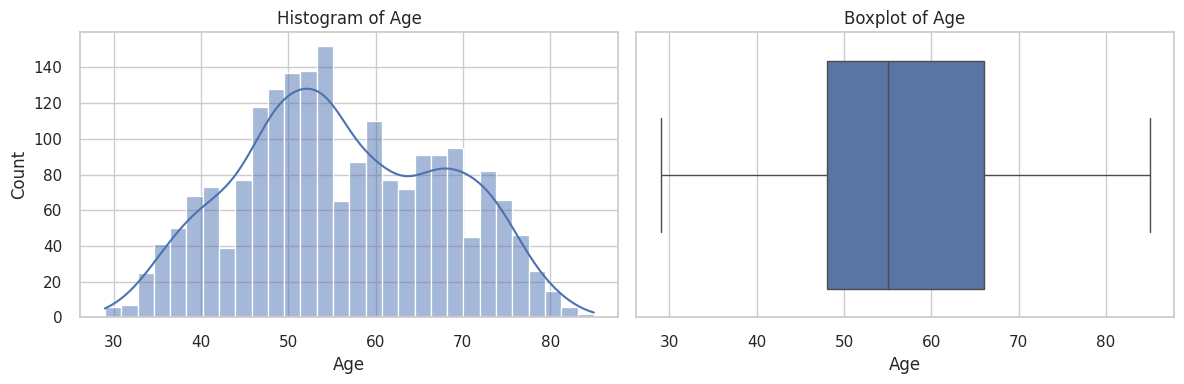

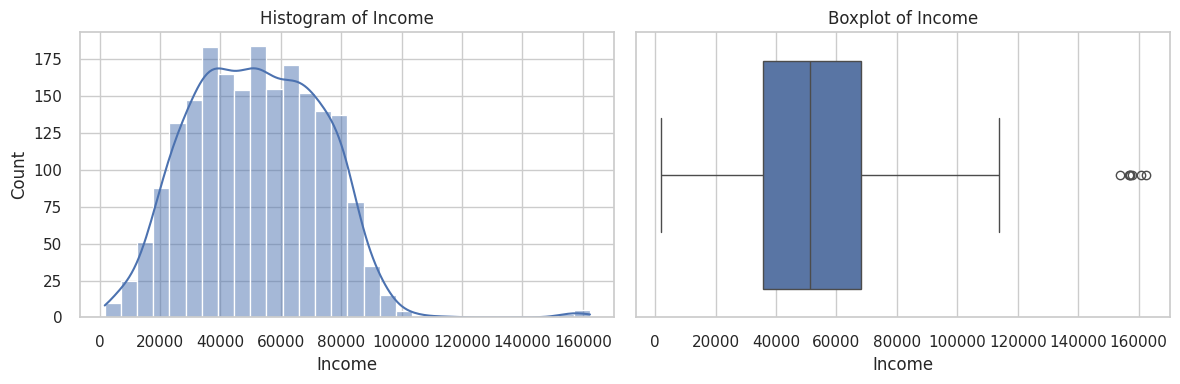

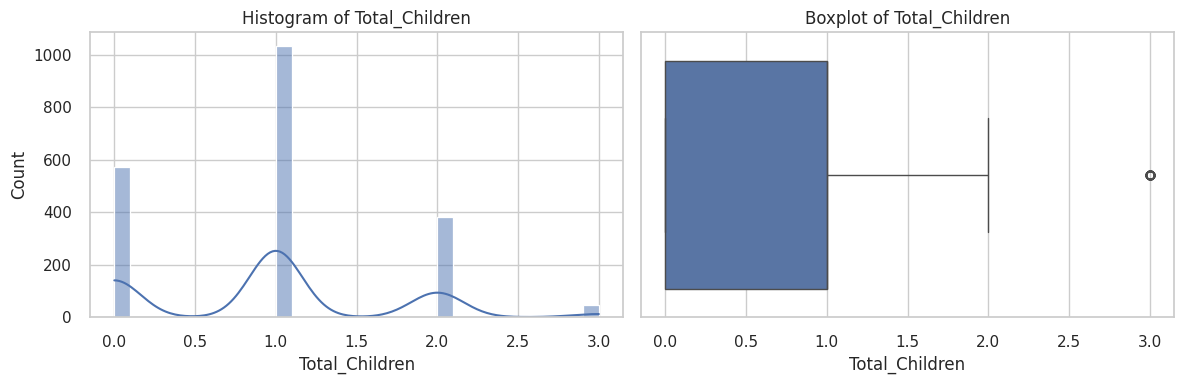

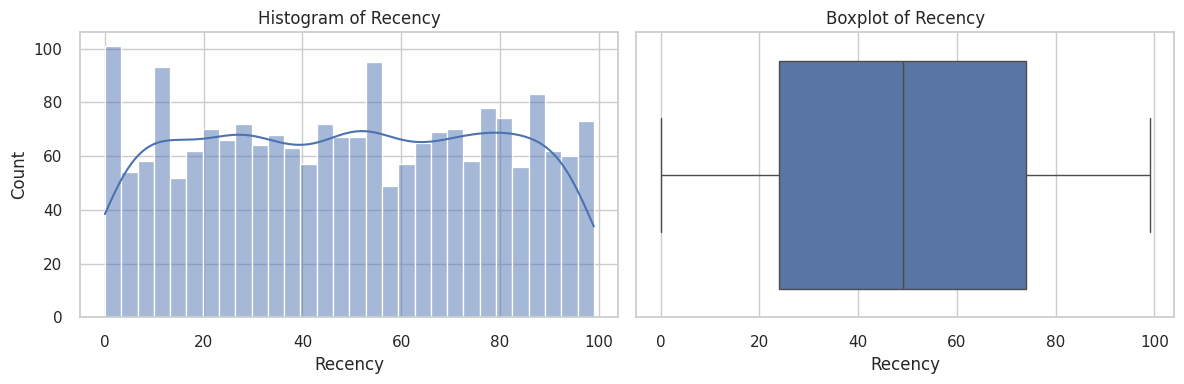

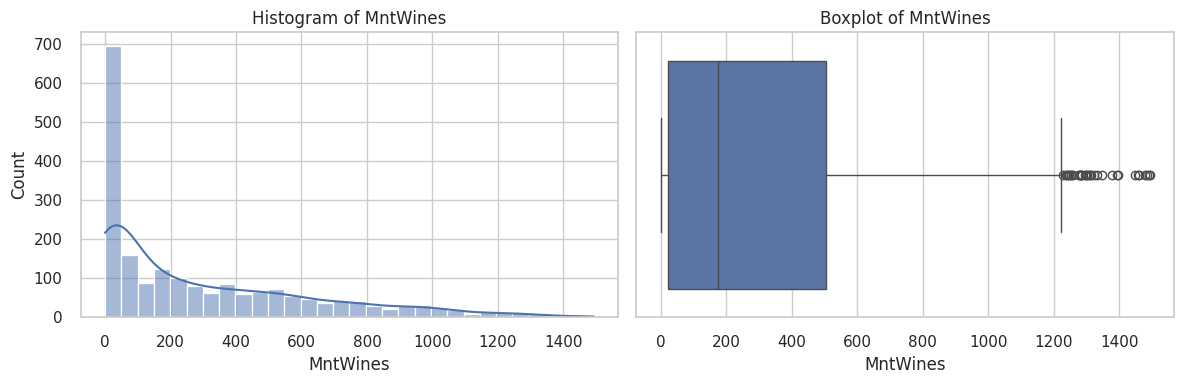

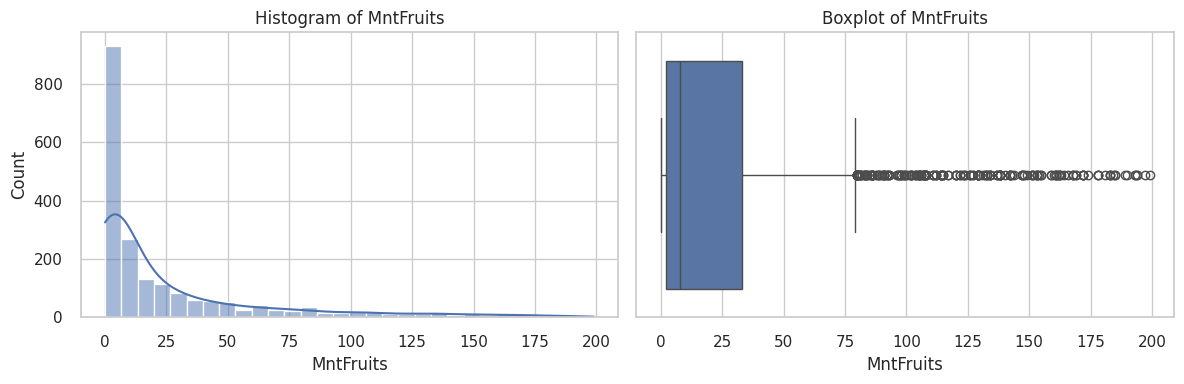

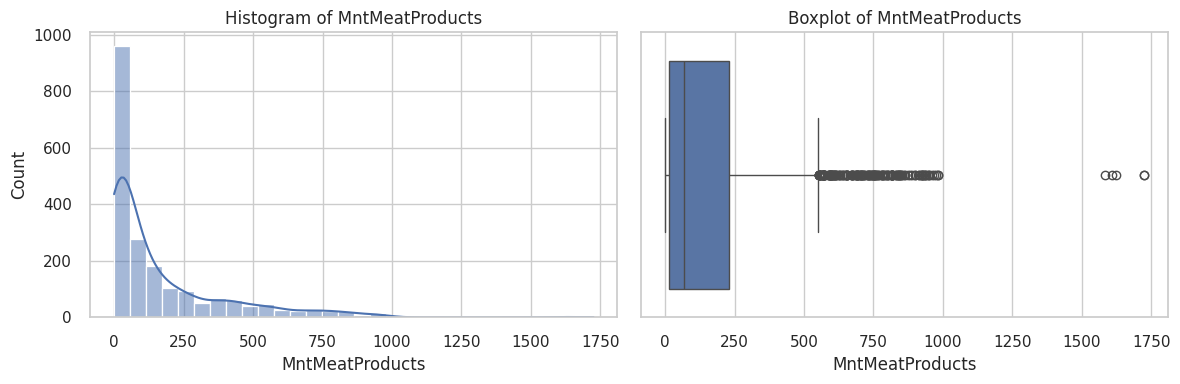

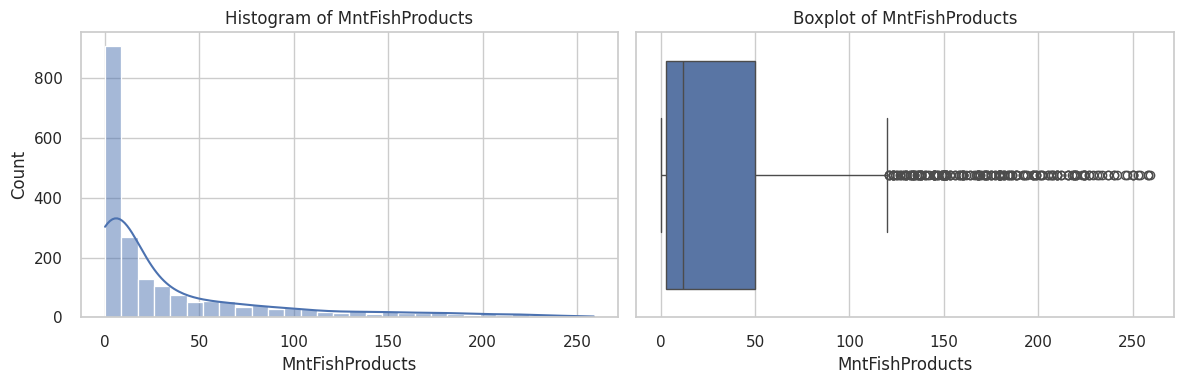

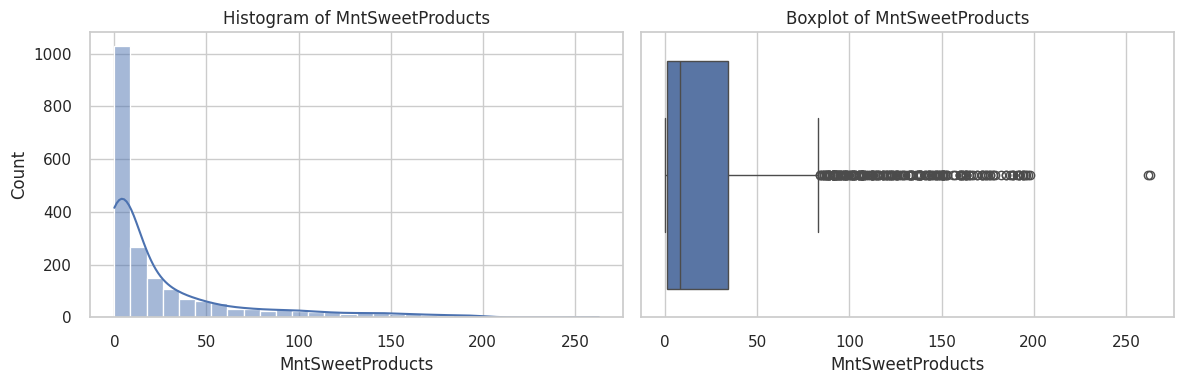

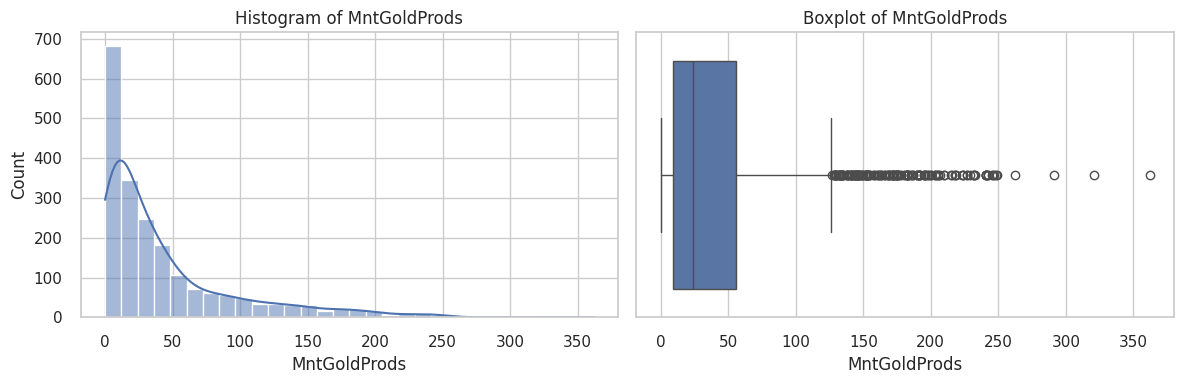

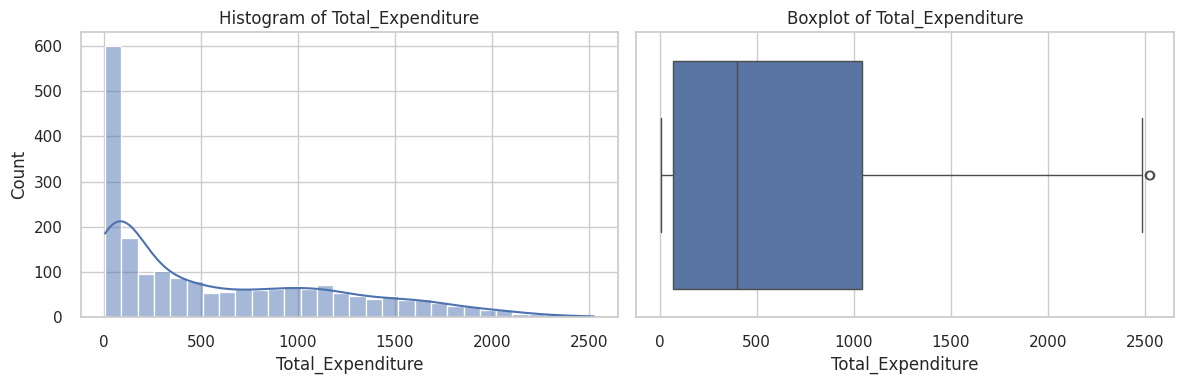

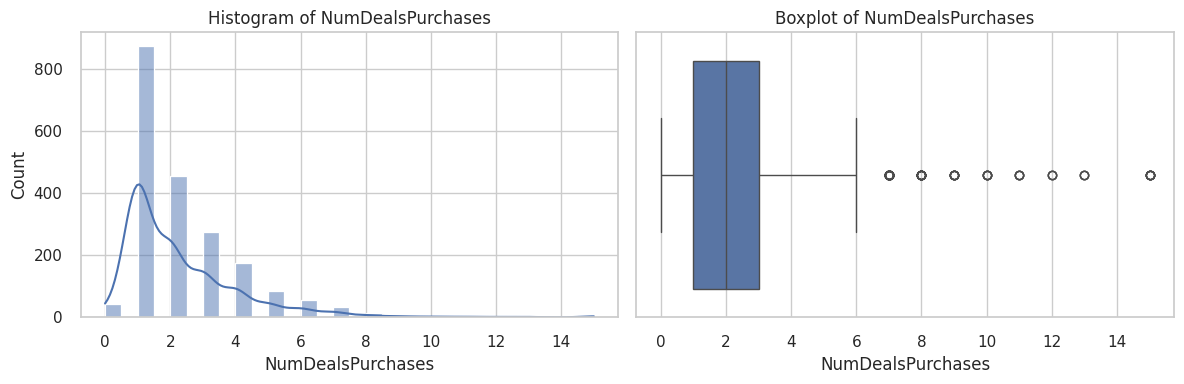

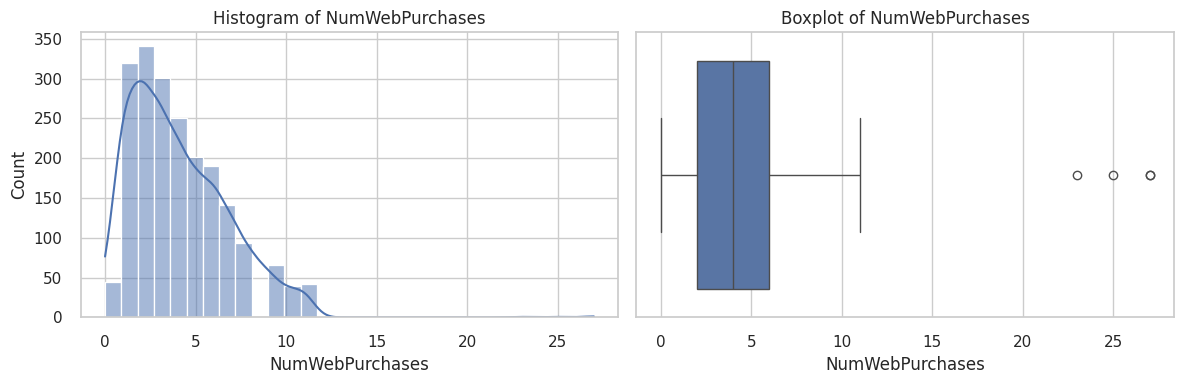

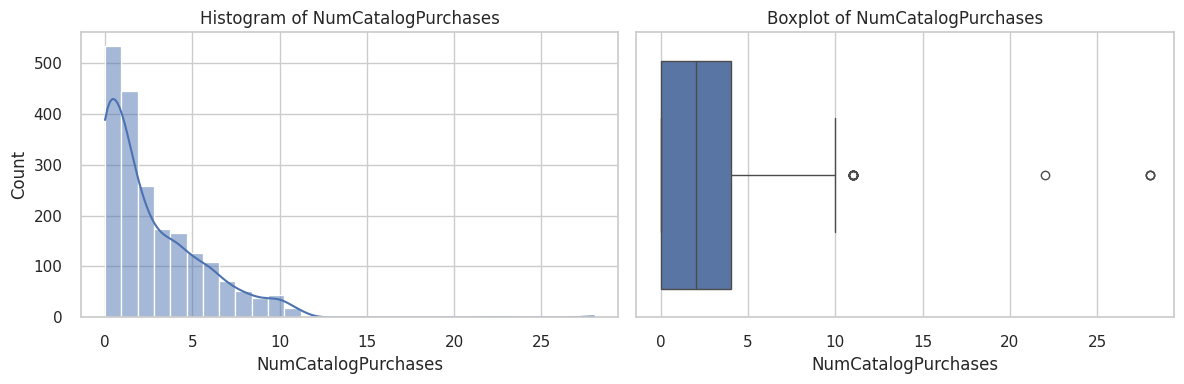

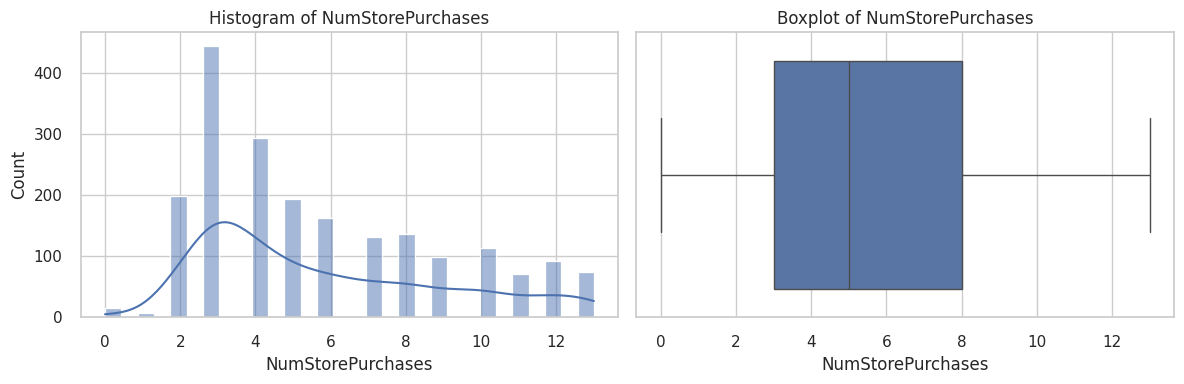

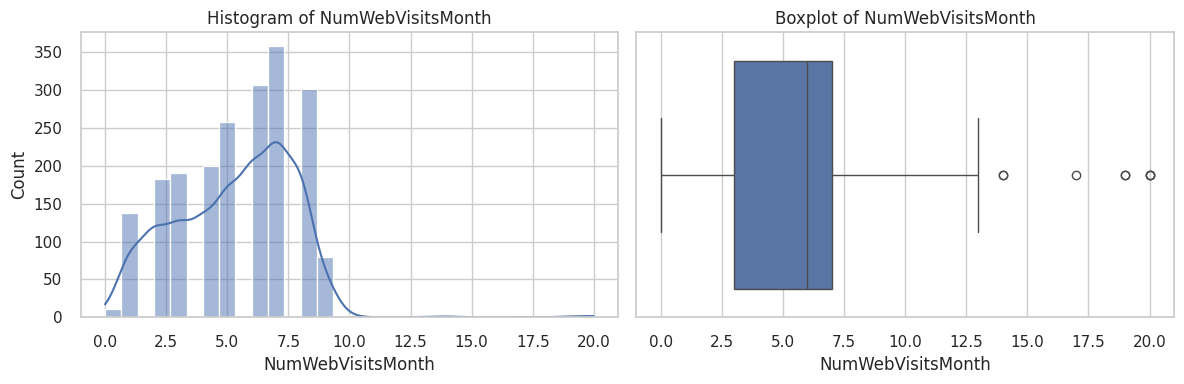

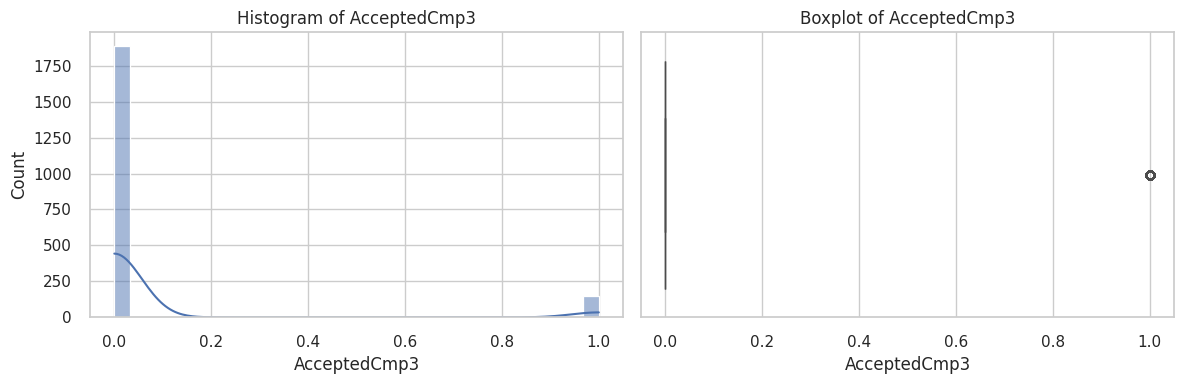

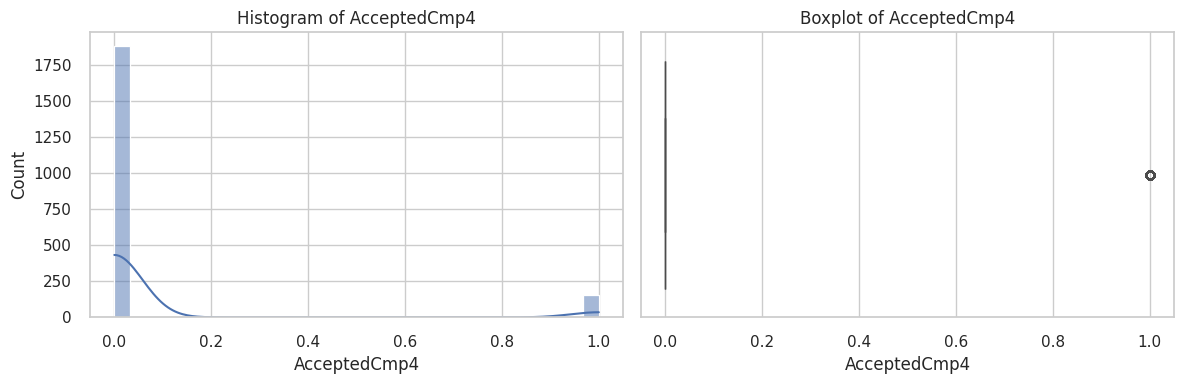

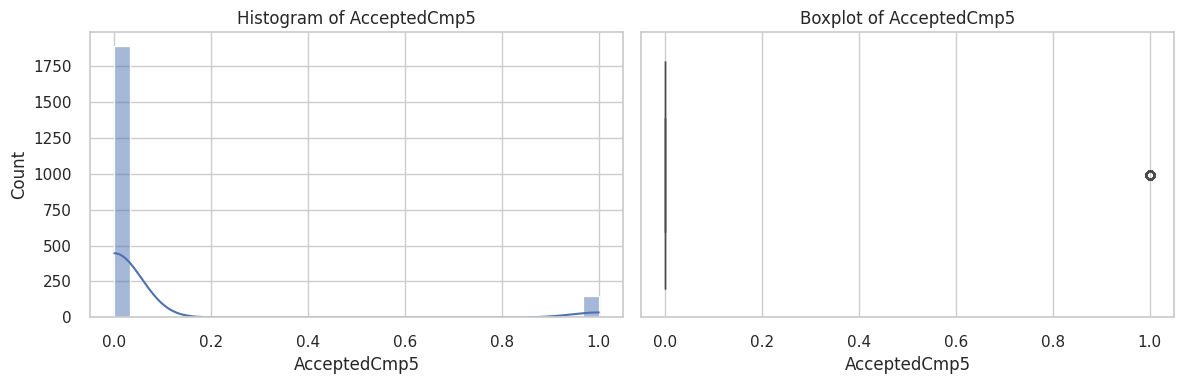

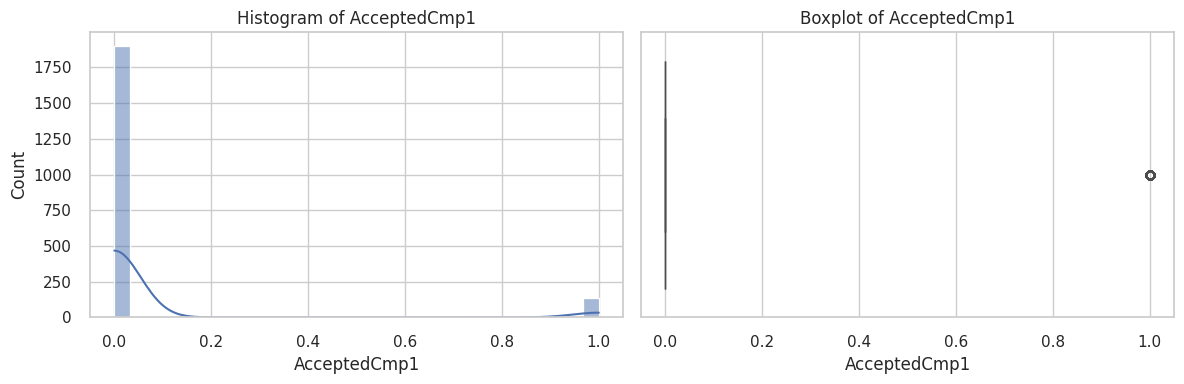

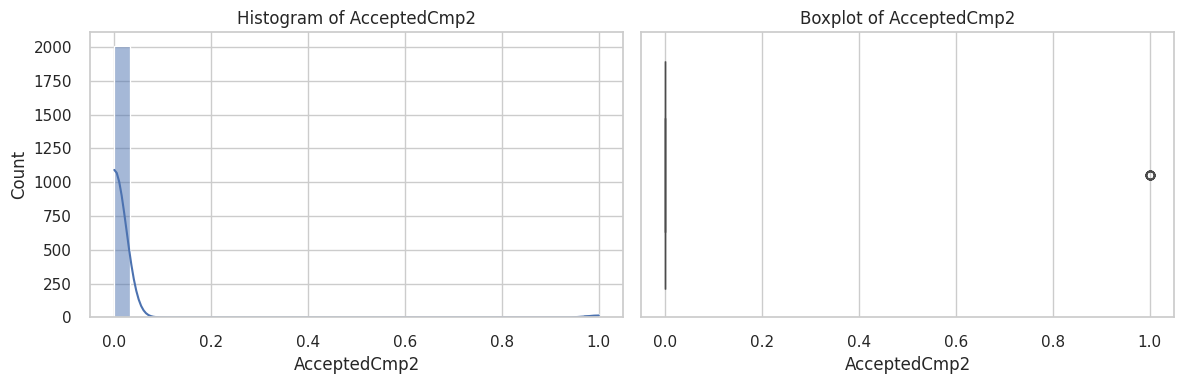

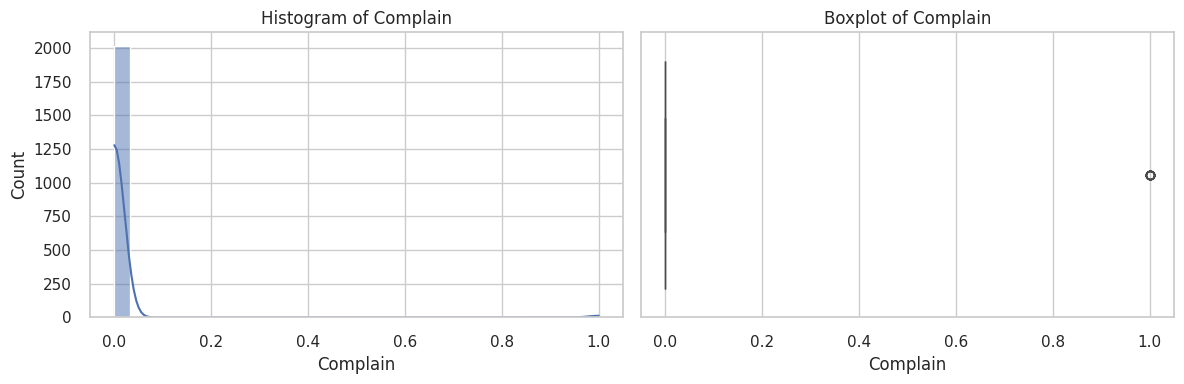

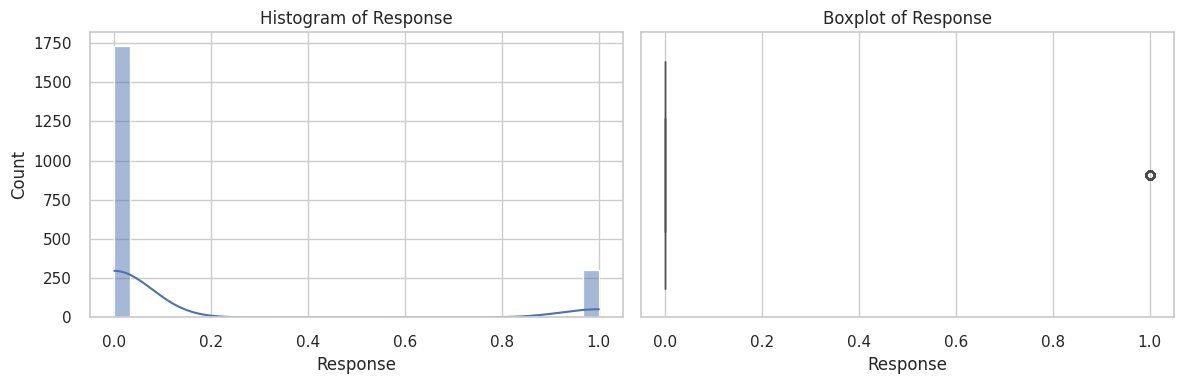

In [46]:
# I'm currently reading 'Storytelling with Data' by
# Cole Nussbaumer Knaflic and it was noted in one
# of the chapters that displaying your charts with more
# white space, lighter or minimal borders will improve
# legibility of the chart/table
sns.set(style="whitegrid")

for col in numeric_columns:
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()


##### **Observations:**


### Bivariate Analysis

#### **Question 6:** Perform multivariate analysis to explore the relationsips between the variables.

In [47]:
age_filtered = df[(df['Age'] >= 65) & (df['Age'] <= 100)]

* Focusing on the senior customers can help create a compaign solely for this population

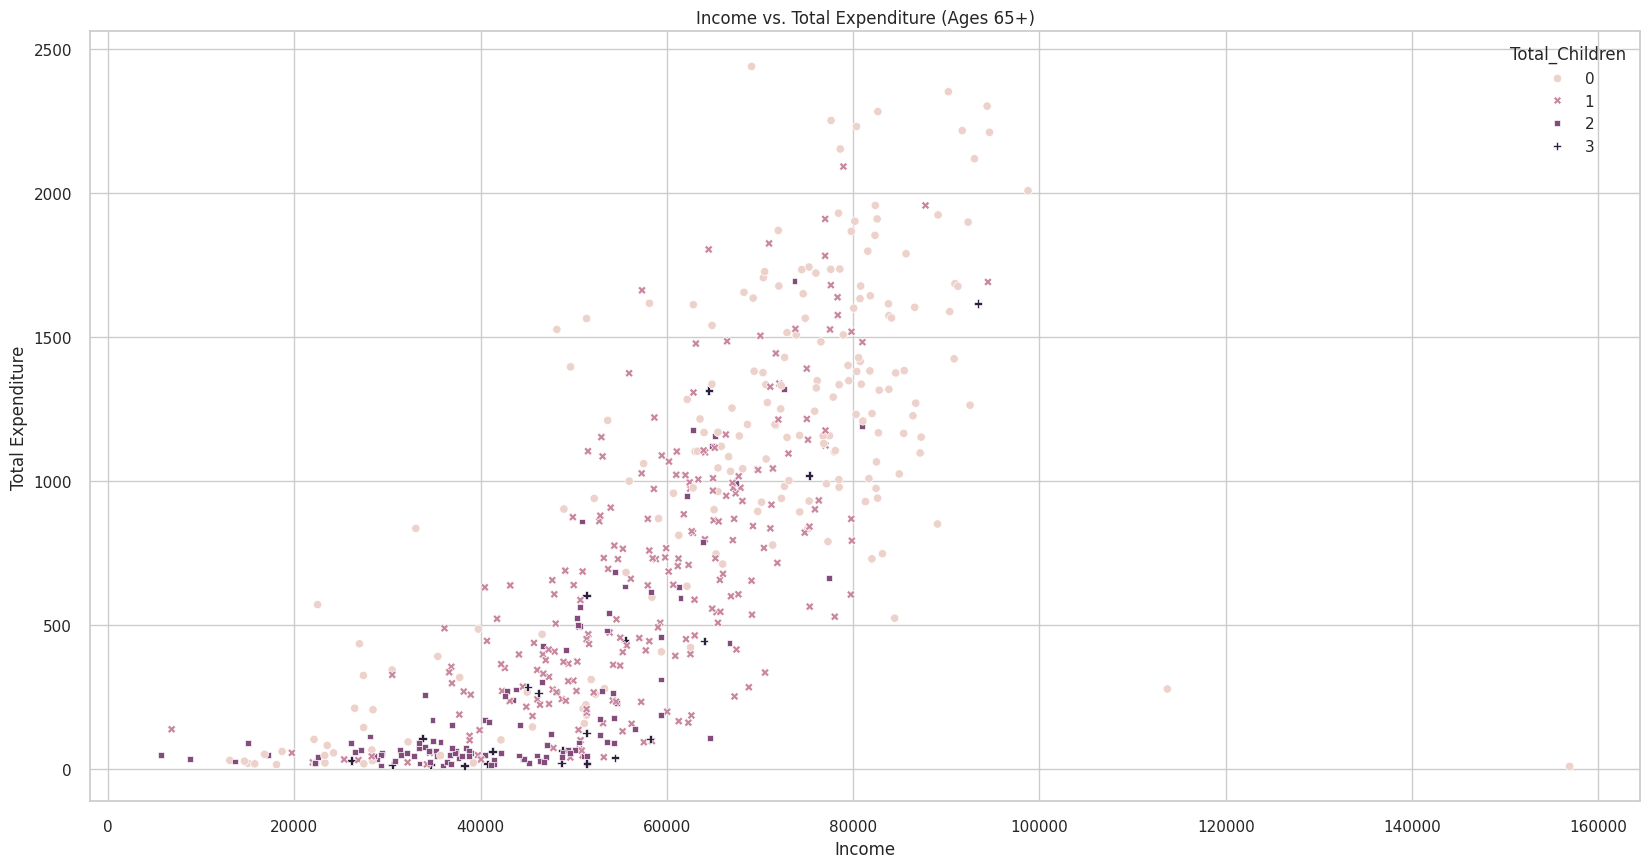

In [48]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=age_filtered, x='Income', y='Total_Expenditure', hue='Total_Children', style='Total_Children' )
plt.title('Income vs. Total Expenditure (Ages 65+)')
plt.xlabel('Income')
plt.ylabel('Total Expenditure');


* **There's a positive correlation with total expenditure and zero and one kids.**
* **There's a negative correlation with total expenditure and two or three kids.**

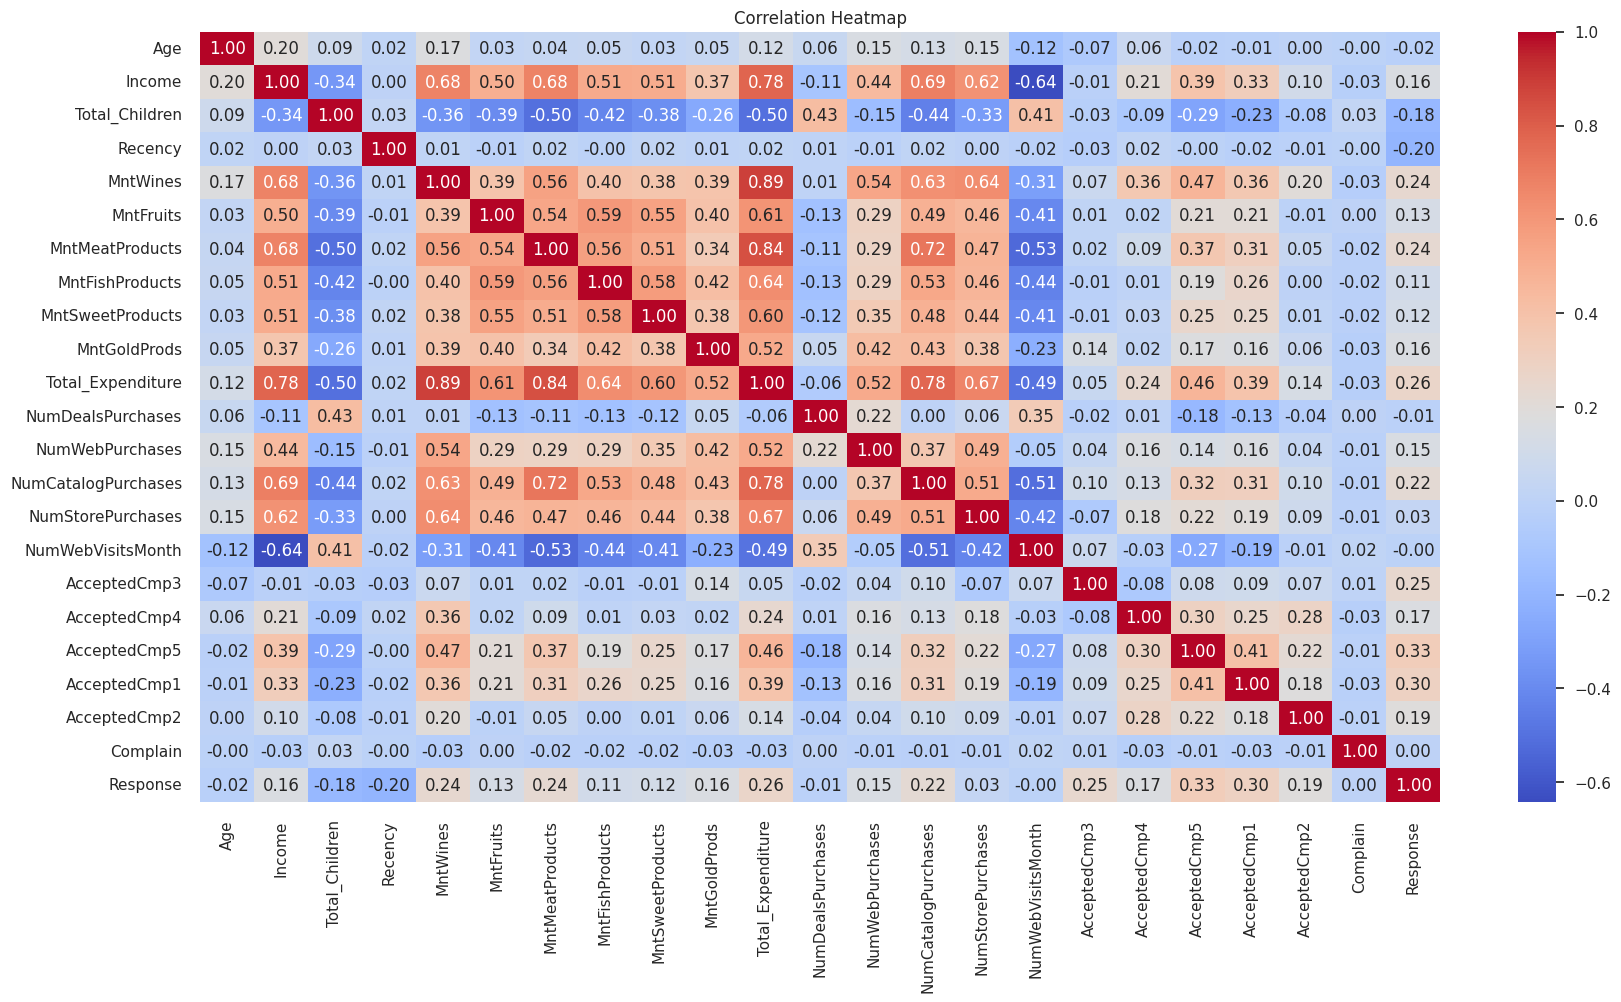

In [49]:
plt.figure(figsize=(20, 10))
sns.heatmap(df[numeric_columns].corr(), annot=True, fmt='.2f', cmap='coolwarm')
# Had to use the argument 'fmt='.2f'' to avoid the overlapping of the numeric
# values (floats)
plt.title("Correlation Heatmap");

Text(0.5, 5.388888888888884, 'Average Expenditure')

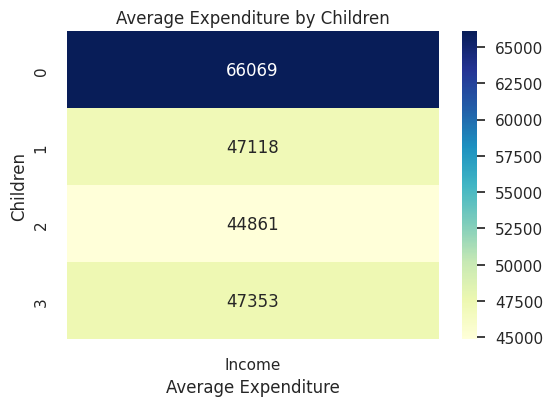

In [50]:
# I want to solely focus on total expenditure and children
pivot = df.pivot_table(values='Income', index='Total_Children', aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(pivot, annot=True, cmap='YlGnBu', fmt=".0f")
plt.title("Average Expenditure by Children")
plt.ylabel("Children")
plt.xlabel("Average Expenditure")


* **To confirm the heatmap analysis above, customers with a higher income and 1 to 0 children are spending more on premium products such as wine and meat.**

##### **Observations:**



## **K-means Clustering**

#### **Question 7** : Select the appropriate number of clusters using the elbow Plot. What do you think is the appropriate number of clusters?

In [51]:
# Scaling Data
scaler = StandardScaler()
scaler.fit(df[numeric_columns])
scaled_df = scaler.transform(df[numeric_columns])

In [52]:
scaled_df = pd.DataFrame(scaled_df, columns=numeric_columns)
scaled_df

,Age,Income,Total_Children,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Expenditure,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1.016940,0.284005,-1.272223,0.307158,0.987267,1.551243,1.659887,2.458858,1.456736,0.853324,1.680608,0.346216,1.391914,2.499533,-0.549520,0.691898,-0.280056,-0.287136,-0.27801,-0.265498,-0.113762,-0.09708,2.390852
1,1.273974,-0.265025,1.398198,-0.383409,-0.871351,-0.636878,-0.710086,-0.648260,-0.628952,-0.726797,-0.962689,-0.170695,-1.107495,-0.565269,-1.167521,-0.128383,-0.280056,-0.287136,-0.27801,-0.265498,-0.113762,-0.09708,-0.418261
2,0.331514,0.911288,-1.272223,-0.797748,0.364749,0.570361,-0.179037,1.343951,-0.149483,-0.033085,0.282487,-0.687607,1.391914,-0.224735,1.304484,-0.538523,-0.280056,-0.287136,-0.27801,-0.265498,-0.113762,-0.09708,-0.418261
3,-1.296373,-1.182000,0.062988,-0.797748,-0.871351,-0.561425,-0.648643,-0.502043,-0.581005,-0.746067,-0.919465,-0.170695,-0.750437,-0.905803,-0.549520,0.281757,-0.280056,-0.287136,-0.27801,-0.265498,-0.113762,-0.09708,-0.418261
4,-1.039338,0.291220,0.062988,1.550177,-0.388825,0.419456,-0.218536,0.155935,-0.005643,-0.553369,-0.306021,1.380039,0.320738,0.115798,0.068481,-0.128383,-0.280056,-0.287136,-0.27801,-0.265498,-0.113762,-0.09708,-0.418261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2030,-1.467729,-1.174086,-1.272223,0.030931,-0.889222,-0.636878,-0.710086,-0.629983,-0.557032,-0.784606,-0.971001,-0.687607,-1.464554,-0.905803,-0.858521,-0.538523,-0.280056,-0.287136,-0.27801,-0.265498,-0.113762,-0.09708,-0.418261
2031,0.160157,0.427616,0.062988,-0.107182,1.207680,0.419456,0.062350,0.082827,2.175939,3.917217,1.221771,-0.170695,1.748972,0.115798,-0.549520,-0.128383,-0.280056,-0.287136,-0.27801,-0.265498,-0.113762,-0.09708,-0.418261
2032,-1.039338,0.230144,-1.272223,1.446592,1.800412,0.545210,0.215959,-0.099945,-0.365244,-0.379941,1.055526,-0.687607,-0.750437,0.115798,2.231486,0.281757,-0.280056,3.482676,-0.27801,-0.265498,-0.113762,-0.09708,-0.418261
2033,1.102618,0.801054,0.062988,-1.419258,0.370706,0.092496,0.202792,0.777359,0.066277,0.333040,0.393871,-0.170695,0.677797,0.796865,1.304484,-0.948664,-0.280056,-0.287136,-0.27801,-0.265498,-0.113762,-0.09708,-0.418261


In [53]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=scaled_df.shape[1], random_state=0)
pca.fit(scaled_df)
pca_df = pca.transform(scaled_df)

In [54]:
pca_df=pd.DataFrame(pca_df)
pca_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,4.149757,-0.303036,0.723632,1.850903,-0.182339,-0.152770,0.111443,-0.273253,1.253013,0.368988,3.046199,-0.787990,0.502814,-0.206271,-0.434711,0.659253,-0.694058,0.591977,0.314091,0.940315,-0.166974,-0.209177,8.148095e-16
1,-2.573389,-0.213221,-0.120161,-0.853167,-1.190850,-0.009604,1.043136,-0.235905,0.550354,0.660633,-0.258920,0.192556,-0.333305,0.210785,-0.138494,0.152570,-0.404075,0.030256,-0.082392,0.098867,0.038967,0.008222,4.412656e-16
2,1.685237,-1.064779,0.270826,-0.153944,-0.819591,-0.501579,-0.547603,1.074560,-0.086218,-1.137381,-0.395425,-0.298136,0.395375,-0.589270,0.180304,-0.626835,0.165701,0.596905,1.031637,-0.059204,0.142394,0.397159,-1.186132e-16
3,-2.560207,-0.204273,-0.991120,0.282960,-0.028128,-0.507371,-1.022704,0.006530,-0.498714,0.041766,-0.379991,0.047599,0.077017,-0.019574,-0.082416,-0.020892,0.175471,0.022633,0.082853,-0.044014,0.002072,-0.302120,2.951460e-16
4,-0.333407,-0.667639,0.831359,-0.129032,1.616206,0.218464,-0.389119,-0.617926,-0.404121,0.747963,0.184712,-0.249958,-0.114549,-0.333802,0.510199,-0.280654,0.266869,-0.312589,0.865700,0.251444,0.314007,0.313219,2.664207e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2030,-2.386305,-0.730401,-2.266482,-0.192369,0.554290,-0.267364,-0.662313,0.204365,-0.687160,-0.212305,0.110480,0.051247,0.371076,0.265376,0.158363,0.057644,0.731751,-0.277928,0.173396,0.066154,0.596500,-0.238762,2.948186e-16
2031,2.479064,-0.706826,1.687356,1.332705,0.729585,-0.291522,-0.211349,1.245597,1.311688,-0.997459,-0.303669,1.999999,-0.151780,0.979075,0.227932,1.438539,-1.143425,-0.409113,-1.256579,-0.066683,0.897766,-0.331810,-5.714662e-16
2032,1.797667,0.904159,-0.162810,-2.319202,1.754522,0.023421,-1.261719,0.379206,-1.425882,-1.633042,0.563283,-1.931627,-0.792169,1.088891,-0.251142,-1.145218,0.825390,0.177104,-1.244398,0.034077,-0.090752,0.129277,-1.034893e-15
2033,1.655316,-0.851266,0.899168,-0.301180,-1.756067,-0.445912,0.191519,0.646084,-0.315130,-0.037972,-0.657947,0.075645,0.198464,0.077999,0.079006,-0.080505,0.146782,0.422188,0.217484,0.194895,-0.419720,-0.096157,2.655991e-16


In [55]:
pca_df.var()/sum(pca_df.var())

,0
0,3.237067e-01
1,8.201194e-02
2,7.693081e-02
3,5.980442e-02
4,4.495579e-02
5,4.360130e-02
6,4.208084e-02
7,3.671783e-02
8,3.340846e-02
9,3.271164e-02


In [56]:
pca.explained_variance_

array([7.44891483, 1.88720203, 1.77027847, 1.37617801, 1.03449149,
       1.00332298, 0.9683352 , 0.84492519, 0.76877245, 0.75273767,
       0.6651405 , 0.60063004, 0.5819381 , 0.56592389, 0.48872571,
       0.45408314, 0.41086314, 0.38678788, 0.3427593 , 0.25331746,
       0.22196077, 0.18401952, 0.        ])

In [57]:
pca.explained_variance_ratio_

array([0.32370671, 0.08201194, 0.07693081, 0.05980442, 0.04495579,
       0.0436013 , 0.04208084, 0.03671783, 0.03340846, 0.03271164,
       0.02890494, 0.02610152, 0.02528922, 0.0245933 , 0.0212385 ,
       0.01973304, 0.01785484, 0.0168086 , 0.01489526, 0.01100839,
       0.00964573, 0.00799692, 0.        ])

In [58]:
sum(pca.explained_variance_ratio_[:5])

0.5874096752554518

In [59]:
model = KMeans(n_clusters=5)
model.fit(pca_df)

KMeans(n_clusters=5)

In [60]:
model.predict(pca_df).shape

(2035,)

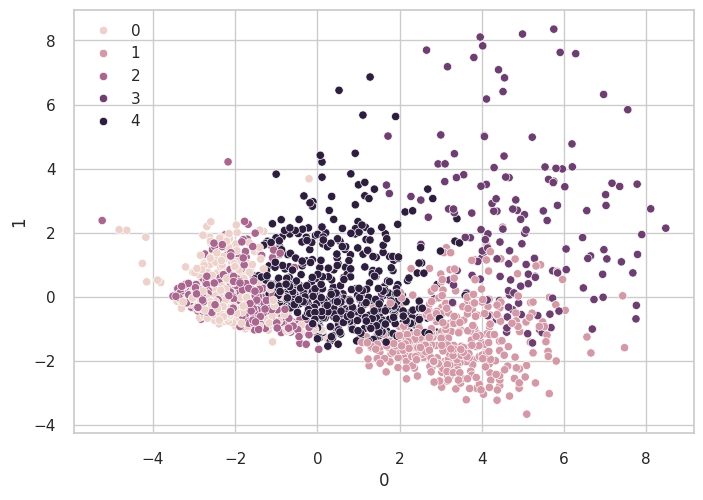

In [61]:
sns.scatterplot(x=pca_df.iloc[:,0], y=pca_df.iloc[:,1], hue=model.predict(pca_df));

In [62]:
clusters_=range(1,10)
distortion = []

for k in clusters_:
  model = KMeans(n_clusters=k)
  model.fit(pca_df)
  Y = model.predict(pca_df)

  distortion.append(
      sum(np.min(cdist(pca_df, model.cluster_centers_,), axis=1)) / pca_df.shape[0]
  )

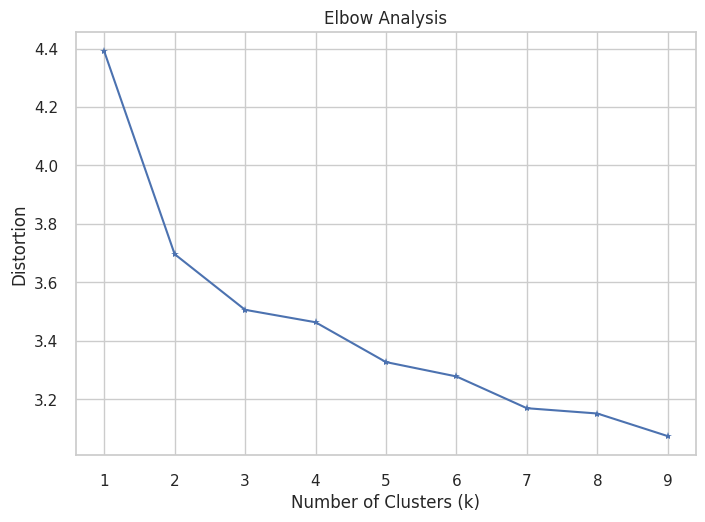

In [63]:
plt.plot(clusters_, distortion, '*-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('Elbow Analysis');

In [64]:
model = KMeans(n_clusters=4)
model.fit(pca_df)

KMeans(n_clusters=4)

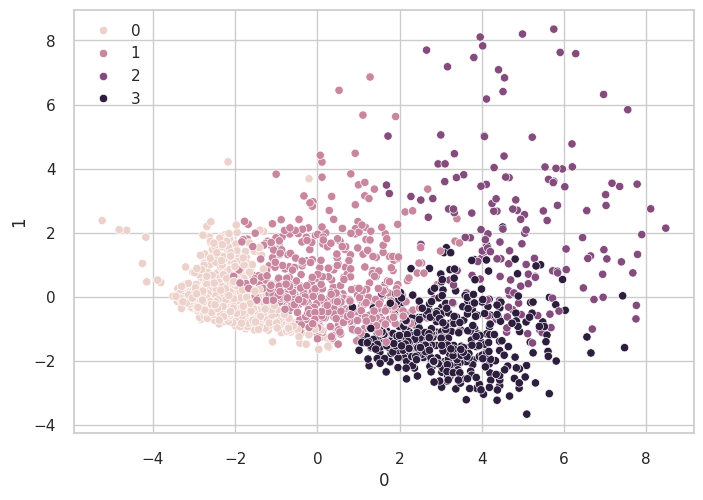

In [65]:
sns.scatterplot(x=pca_df.iloc[:,0], y=pca_df.iloc[:,1], hue=model.predict(pca_df));

##### **Observations:**

* **After reading the output of the Elbow plot, I've determined that the appropriate number of clusters would be 4.**

#### **Question 8** : finalize appropriate number of clusters by checking the silhoutte score as well. Is the answer different from the elbow plot?

In [66]:
model_kmeans = model

In [67]:
df_kmeans = scaled_df.copy()
df_kmeans['labels'] = model_kmeans.labels_
df_kmeans

,Age,Income,Total_Children,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Expenditure,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,labels
0,1.016940,0.284005,-1.272223,0.307158,0.987267,1.551243,1.659887,2.458858,1.456736,0.853324,1.680608,0.346216,1.391914,2.499533,-0.549520,0.691898,-0.280056,-0.287136,-0.27801,-0.265498,-0.113762,-0.09708,2.390852,3
1,1.273974,-0.265025,1.398198,-0.383409,-0.871351,-0.636878,-0.710086,-0.648260,-0.628952,-0.726797,-0.962689,-0.170695,-1.107495,-0.565269,-1.167521,-0.128383,-0.280056,-0.287136,-0.27801,-0.265498,-0.113762,-0.09708,-0.418261,0
2,0.331514,0.911288,-1.272223,-0.797748,0.364749,0.570361,-0.179037,1.343951,-0.149483,-0.033085,0.282487,-0.687607,1.391914,-0.224735,1.304484,-0.538523,-0.280056,-0.287136,-0.27801,-0.265498,-0.113762,-0.09708,-0.418261,3
3,-1.296373,-1.182000,0.062988,-0.797748,-0.871351,-0.561425,-0.648643,-0.502043,-0.581005,-0.746067,-0.919465,-0.170695,-0.750437,-0.905803,-0.549520,0.281757,-0.280056,-0.287136,-0.27801,-0.265498,-0.113762,-0.09708,-0.418261,0
4,-1.039338,0.291220,0.062988,1.550177,-0.388825,0.419456,-0.218536,0.155935,-0.005643,-0.553369,-0.306021,1.380039,0.320738,0.115798,0.068481,-0.128383,-0.280056,-0.287136,-0.27801,-0.265498,-0.113762,-0.09708,-0.418261,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2030,-1.467729,-1.174086,-1.272223,0.030931,-0.889222,-0.636878,-0.710086,-0.629983,-0.557032,-0.784606,-0.971001,-0.687607,-1.464554,-0.905803,-0.858521,-0.538523,-0.280056,-0.287136,-0.27801,-0.265498,-0.113762,-0.09708,-0.418261,0
2031,0.160157,0.427616,0.062988,-0.107182,1.207680,0.419456,0.062350,0.082827,2.175939,3.917217,1.221771,-0.170695,1.748972,0.115798,-0.549520,-0.128383,-0.280056,-0.287136,-0.27801,-0.265498,-0.113762,-0.09708,-0.418261,3
2032,-1.039338,0.230144,-1.272223,1.446592,1.800412,0.545210,0.215959,-0.099945,-0.365244,-0.379941,1.055526,-0.687607,-0.750437,0.115798,2.231486,0.281757,-0.280056,3.482676,-0.27801,-0.265498,-0.113762,-0.09708,-0.418261,1
2033,1.102618,0.801054,0.062988,-1.419258,0.370706,0.092496,0.202792,0.777359,0.066277,0.333040,0.393871,-0.170695,0.677797,0.796865,1.304484,-0.948664,-0.280056,-0.287136,-0.27801,-0.265498,-0.113762,-0.09708,-0.418261,1


In [68]:
df_kmeans.groupby('labels').count()

,Age,Income,Total_Children,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Expenditure,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
labels,,,,,,,,,,,,,,,,,,,,,,,
0,940,940,940,940,940,940,940,940,940,940,940,940,940,940,940,940,940,940,940,940,940,940,940
1,519,519,519,519,519,519,519,519,519,519,519,519,519,519,519,519,519,519,519,519,519,519,519
2,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155
3,421,421,421,421,421,421,421,421,421,421,421,421,421,421,421,421,421,421,421,421,421,421,421


In [69]:
df_kmeans.groupby('labels').mean()

,Age,Income,Total_Children,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Expenditure,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
labels,,,,,,,,,,,,,,,,,,,,,,,
0,-0.223754,-0.779140,0.371223,0.016385,-0.780885,-0.538495,-0.637236,-0.558196,-0.529972,-0.551565,-0.847925,-0.172345,-0.720049,-0.715611,-0.796392,0.441014,-0.013779,-0.255052,-0.278010,-0.261209,-0.104289,0.013535,-0.176199
1,0.326231,0.215901,0.333117,-0.043913,0.411161,-0.153536,-0.169718,-0.191437,-0.171655,0.271481,0.149154,0.829265,0.810576,0.081679,0.575147,0.250938,0.001889,0.250371,-0.263077,-0.125660,-0.027981,-0.036977,-0.082683
2,-0.086375,1.369388,-1.031023,0.026030,1.698738,0.741873,1.313877,0.696939,0.905502,0.612887,1.673915,-0.660927,0.493509,1.148384,0.754263,-0.911619,0.266505,1.220789,3.321992,1.555407,1.035148,-0.029998,1.230960
3,0.129224,0.969320,-0.859925,0.007967,0.611247,1.118482,1.148301,1.225735,1.061545,0.671199,1.093068,-0.394158,0.426753,1.074307,0.791440,-0.958406,-0.069681,-0.188637,-0.278010,0.165476,-0.113762,0.026409,0.042140


In [70]:
cluster_kmeans = df_kmeans.groupby('labels').mean()
cluster_kmeans['count']=df_kmeans.groupby('labels')['Total_Expenditure'].count().values

In [71]:
cluster_kmeans.style.highlight_max()

,Age,Income,Total_Children,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Expenditure,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,count
labels,,,,,,,,,,,,,,,,,,,,,,,,
0,-0.223754,-0.779140,0.371223,0.016385,-0.780885,-0.538495,-0.637236,-0.558196,-0.529972,-0.551565,-0.847925,-0.172345,-0.720049,-0.715611,-0.796392,0.441014,-0.013779,-0.255052,-0.278010,-0.261209,-0.104289,0.013535,-0.176199,940
1,0.326231,0.215901,0.333117,-0.043913,0.411161,-0.153536,-0.169718,-0.191437,-0.171655,0.271481,0.149154,0.829265,0.810576,0.081679,0.575147,0.250938,0.001889,0.250371,-0.263077,-0.125660,-0.027981,-0.036977,-0.082683,519
2,-0.086375,1.369388,-1.031023,0.026030,1.698738,0.741873,1.313877,0.696939,0.905502,0.612887,1.673915,-0.660927,0.493509,1.148384,0.754263,-0.911619,0.266505,1.220789,3.321992,1.555407,1.035148,-0.029998,1.230960,155
3,0.129224,0.969320,-0.859925,0.007967,0.611247,1.118482,1.148301,1.225735,1.061545,0.671199,1.093068,-0.394158,0.426753,1.074307,0.791440,-0.958406,-0.069681,-0.188637,-0.278010,0.165476,-0.113762,0.026409,0.042140,421


In [72]:
cluster_kmeans.style.highlight_min(color='lightblue')

,Age,Income,Total_Children,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Expenditure,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,count
labels,,,,,,,,,,,,,,,,,,,,,,,,
0,-0.223754,-0.779140,0.371223,0.016385,-0.780885,-0.538495,-0.637236,-0.558196,-0.529972,-0.551565,-0.847925,-0.172345,-0.720049,-0.715611,-0.796392,0.441014,-0.013779,-0.255052,-0.278010,-0.261209,-0.104289,0.013535,-0.176199,940
1,0.326231,0.215901,0.333117,-0.043913,0.411161,-0.153536,-0.169718,-0.191437,-0.171655,0.271481,0.149154,0.829265,0.810576,0.081679,0.575147,0.250938,0.001889,0.250371,-0.263077,-0.125660,-0.027981,-0.036977,-0.082683,519
2,-0.086375,1.369388,-1.031023,0.026030,1.698738,0.741873,1.313877,0.696939,0.905502,0.612887,1.673915,-0.660927,0.493509,1.148384,0.754263,-0.911619,0.266505,1.220789,3.321992,1.555407,1.035148,-0.029998,1.230960,155
3,0.129224,0.969320,-0.859925,0.007967,0.611247,1.118482,1.148301,1.225735,1.061545,0.671199,1.093068,-0.394158,0.426753,1.074307,0.791440,-0.958406,-0.069681,-0.188637,-0.278010,0.165476,-0.113762,0.026409,0.042140,421


* **Highlighting the cluster min and max labels helps add to the readability of each group to analyze the customers' consumer behaviors further.**

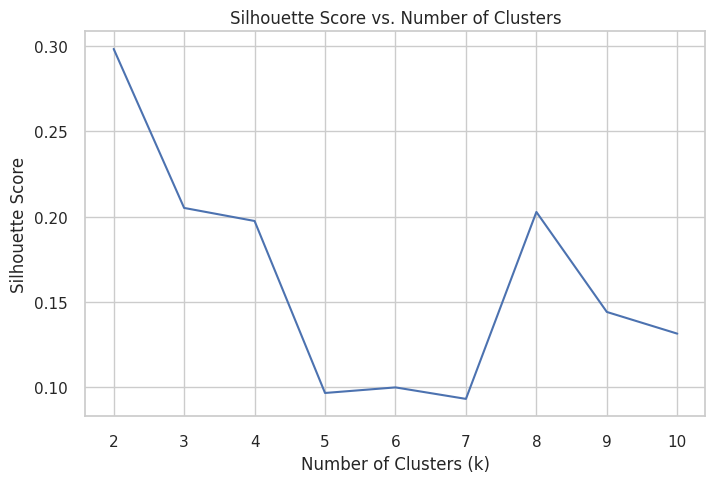

In [73]:
silhouette_scores = []
s_score = range(2, 11)

for k in s_score:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    score = silhouette_score(pca_df, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(s_score, silhouette_scores)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.grid(True)

In [74]:
# Returning a table for the Silhouette Score
s_score = pca_df
K = range(2, 11)
silhouette_data = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(s_score)
    score = silhouette_score(s_score, labels)
    silhouette_data.append({'Number of Clusters (k)': k, 'Silhouette Score': score})


silhouette_df = pd.DataFrame(silhouette_data)
print(silhouette_df)


   Number of Clusters (k)  Silhouette Score
0                       2          0.298236
1                       3          0.205081
2                       4          0.197435
3                       5          0.096690
4                       6          0.099960
5                       7          0.093230
6                       8          0.202717
7                       9          0.144143
8                      10          0.131439


##### **Observations:**

* **Labels 2 shows that the cluster consists of a population of customers who are younger and have lower incomes, which also adds to the lower spending.**

#### **Question 9**: Do a final fit with the appropriate number of clusters. How much total time does it take for the model to fit the data?

In [75]:
import time
start_time = time.time()

kmeans_final = KMeans(n_clusters=4, random_state=42)
df['Final_Fit'] = kmeans_final.fit_predict(pca_df)

end_time = time.time()
total_time = end_time - start_time
print(f"Total time taken: {total_time} seconds")

Total time taken: 0.014981508255004883 seconds


##### **Observations:**

## **Cluster Profiling and Comparison**

#### **Question 10**: Perform cluster profiling using boxplots for the K-Means algorithm. Analyze key characteristics of each cluster and provide detailed observations.

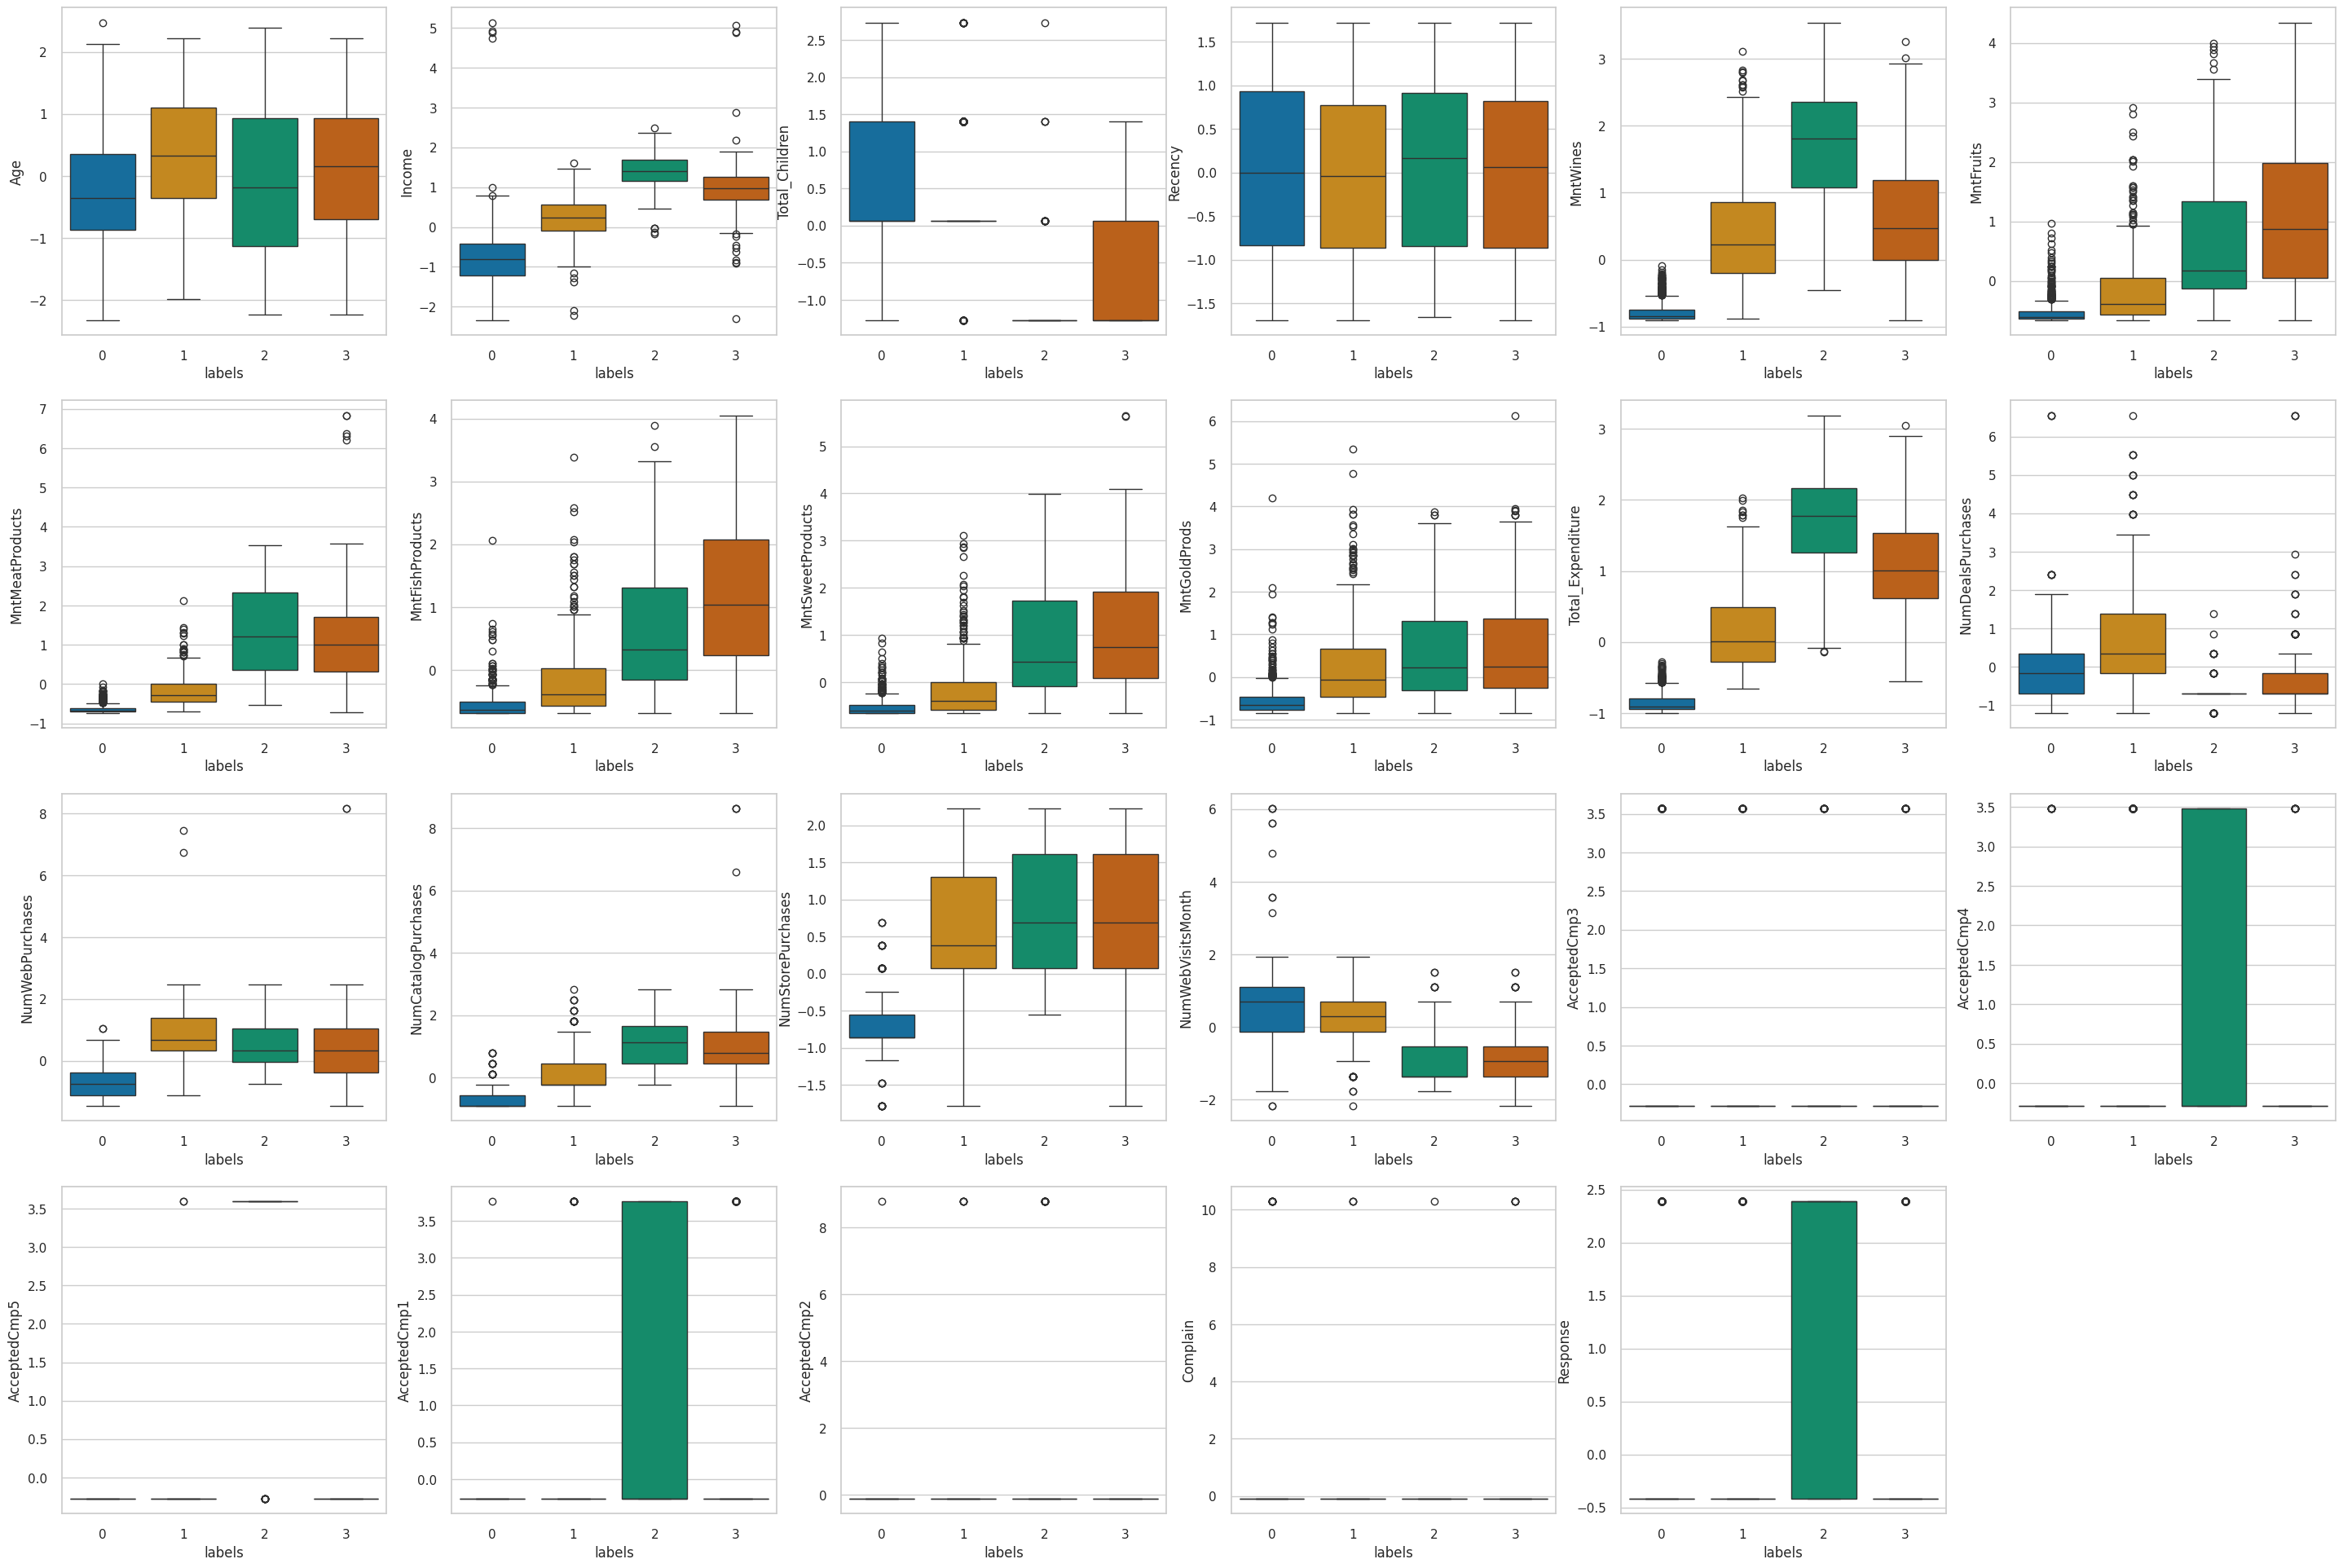

In [76]:
# had to add more to code due to the out of bounds error when attempting to plot
# for 23 features (avoiding duplicate and/or missing plots)
fig, ax = plt.subplots(4, 6, figsize=(36, 24))

for i in range(4):
  for j in range(6):
    if 6*i+j < len(numeric_columns):
      sns.boxplot(data=df_kmeans, x='labels', y=numeric_columns[6*i+j], ax=ax[i,j], palette='colorblind')
    else:
      ax[i, j].axis('off')


##### **Observations:**

**Cluster 0:**
  
  * **AGE:** The oldest population amongst the other clusters.
  * **INCOME:** Average earners with some customers falling below.
  * **CHILDREN:** Ranges slightly above average (average household unit).
  * **RECENCY:** Spread is balanced with median slightly below average. They are deemed to have the most recent purchases.
  * **PURCHASES:** Average with the highest in wines.
  * **EXPENDITURE:** Average with some high spenders.
  * **DEALS:** Highest.
  * **WP (WEB PURCHASES) and MWV (WEB VISITS (PREVIOUS MONTH)):** Both are high and show a strong correlation concerning online interactions.
  * **STORE PURCHASES:** Average compared to the other clusters.
  * **CATALOGS:** Average with some engagement.
  * **CAMPAIGNS:** Rare engagement but ruled obsolete.
  * **COMPLAINTS:** No.
  * **RESPONSE:** No.

**Cluster 1:**

  * **AGE:** Average with some customers slightly older.
  * **INCOME:** Above average/High earners.
  * **CHILDREN:** 0-1 kids. Outliers were detected, but most likely, no children are in the household unit.
  * **RECENCY:** Last purchase has been quite some time (highest amongst the other clusters).
  * **PURCHASES:** High in fruits, fish, sweets, and gold products and average amongst the rest (meat and wine).
  * **EXPENDITURE:** Above average.
  * **DEALS:** Below average despite some outliers.
  * **WP (WEB PURCHASES) and MWV (WEB VISITS (PREVIOUS MONTH)):** MWV are below average, but WP are slightly above, showing that purchases are more likely to happen when engaged online.
  * **STORE PURCHASES:** Highest.
  * **CATALOGS:** Above average (responds well to catalogs).
  * **CAMPAIGNS:** Disengaged.
  * **COMPLAINTS:** According to the highlight(max) complaint is a yes.
  * **RESPONSE:** No.

**Cluster 2:**

  * **AGE:** Spread is balanced, and the median is slightly below average. Considering the spread of the IQR, this population is multigenerational.
  * **INCOME:** Highest earners amongst the other clusters.
  * **CHILDREN:** Household unit has no kids.
  * **RECENCY:** Last purchase has been recent but there are some old purchases.
  * **PURCHASES:** Above average, especially in wine (highest) and meat.
  * **EXPENDITURE:** Highest spenders.
  * **DEALS:** Very low (below the average).
  * **WP (WEB PURCHASES) and MWV (WEB VISITS (PREVIOUS MONTH)):** Similar to k=1, MVW and WP are average with slightly more engagement.
  * **STORE PURCHASES:** High.
  * **CATALOGS:** Highest.
  * **CAMPAIGNS:** Engaged in all, especially campaigns one and four.
  * **COMPLAINTS:** No.
  * **RESPONSE:** Yes.

**Cluster 3:**

  * **AGE:** Youngest.
  * **INCOME** Majority of the lowest earners.
  * **CHILDREN:** Highest child household unit (very close with k=0).
  * **RECENCY:** Low activity, slightly better than k=1, but not much.
  * **PURCHASES:** Significantly low across all products.
  * **EXPENDITURE:** Collectively, the lowest spenders.
  * **DEALS:** Slightly below average, however, has a healthy engagement responding to deals.
  * **WP (WEB PURCHASES) and MWV (WEB VISITS (PREVIOUS MONTH)):** MWV is the highest but has a negative correlation with WP (low, possibly due to a lack of online deals).
  * **STORE PURCHASES:** Low (deeming it due to a lack of deals).
  * **CATALOGS:** Low (below average).
  * **CAMPAIGNS:** Low across all campaigns (disengaged).
  * **COMPLAINTS:** No.
  * **RESPONSE:** No.


#### **Question 11**: Perform cluster profiling on the data using a barplot for the K-Means algorithm. Provide insights and key observations for each cluster based on the visual analysis.

In [77]:
!pip install numpy==1.23.5
!pip install scikit-learn-extra

  Using cached scikit_learn_extra-0.3.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.6 kB)
Using cached scikit_learn_extra-0.3.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.1 MB)


In [78]:
from sklearn_extra.cluster import KMedoids

In [79]:
model_kmedoids = KMedoids(n_clusters=4, random_state=0)
model_kmedoids.fit(pca_df)
model_kmedoids

KMedoids(n_clusters=4, random_state=0)

In [80]:
pd.DataFrame(model_kmedoids.cluster_centers_)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,-2.601270,-0.305820,-0.623217,-0.318330,1.176987,0.131132,-0.078462,-0.196531,0.220534,-0.062295,0.337266,0.002511,0.134987,-0.225474,0.007450,0.038164,0.107647,-0.029890,-0.012972,-0.049796,0.036352,0.090023,1.685932e-16
1,3.116207,-1.145131,-0.261258,-0.410399,-0.119799,-0.215235,-0.464440,0.077885,-1.719018,-0.279958,0.217840,-0.665976,0.711464,-0.732043,-0.034352,-0.035851,-0.312440,0.291777,-0.194548,-0.174292,-0.024799,-0.378883,9.754999e-17
2,-0.611625,0.052150,1.557307,-0.474282,-0.411709,-0.052198,0.485876,0.247005,0.048864,-0.405457,-0.060397,0.444503,0.492655,-0.116837,0.072105,-0.198626,0.287565,-0.195709,0.348644,-0.391255,0.253469,0.548691,-8.819060e-16
3,-2.589864,-0.013035,-0.725883,0.129957,-0.785091,-0.546353,-0.590829,0.061973,-0.180331,-0.056337,-0.246795,-0.004095,0.146746,-0.101231,-0.411321,0.202685,-0.075544,-0.102772,0.042747,-0.088894,0.071757,0.256522,-3.822002e-16


In [81]:
pd.DataFrame(scaler.inverse_transform(pca.inverse_transform(model_kmedoids.cluster_centers_)), columns = numeric_columns)

,Age,Income,Total_Children,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Expenditure,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,49.0,31615.0,1.000000e+00,82.0,2.0,3.0,20.0,6.0,1.100000e+01,9.0,51.0,2.0,2.0,8.881784e-16,3.0,7.0,2.220446e-16,-9.714451e-17,-1.387779e-17,-2.775558e-17,7.285839e-17,-5.898060e-17,2.498002e-16
1,49.0,70893.0,9.992007e-16,42.0,768.0,44.0,561.0,77.0,4.400000e+01,14.0,1508.0,1.0,6.0,6.000000e+00,10.0,3.0,-1.526557e-16,-2.359224e-16,-2.914335e-16,-9.714451e-17,-1.700029e-16,1.110223e-16,-3.053113e-16
2,69.0,62058.0,1.000000e+00,52.0,301.0,7.0,74.0,10.0,-1.776357e-14,58.0,450.0,4.0,6.0,1.000000e+00,7.0,6.0,-1.526557e-16,1.665335e-16,1.249001e-16,2.775558e-17,3.122502e-17,-3.469447e-18,-2.220446e-16
3,52.0,37401.0,1.000000e+00,14.0,19.0,3.0,19.0,3.0,1.000000e+00,3.0,48.0,2.0,2.0,-1.776357e-15,3.0,7.0,-5.551115e-17,9.714451e-17,9.714451e-17,8.326673e-17,-1.214306e-17,1.283695e-16,5.551115e-17


* **I can now observe each cluster center's characteristics according to a 'real' datapoint from the dataset.**

In [82]:
df[(df['Age']== 49) & (df['Recency']== 42)]

,Age,Years_Enrolled,Education,Marital_Status,Income,Total_Children,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Expenditure,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Final_Fit
313,49,12,Master,Single,70893.0,0,42,768,44,561,77,44,14,1508,1,6,6,10,3,0,0,0,0,0,0,0,1
781,49,11,Graduation,Together,36283.0,2,42,6,5,5,8,0,5,29,2,1,0,3,4,0,0,0,0,0,0,0,2


* **This is confirmation that customer k=1 exists in the data set.**

In [83]:
df_kmedoids = scaled_df.copy()
df_kmedoids['labels'] = model_kmedoids.labels_
df_kmedoids

,Age,Income,Total_Children,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Expenditure,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,labels
0,1.016940,0.284005,-1.272223,0.307158,0.987267,1.551243,1.659887,2.458858,1.456736,0.853324,1.680608,0.346216,1.391914,2.499533,-0.549520,0.691898,-0.280056,-0.287136,-0.27801,-0.265498,-0.113762,-0.09708,2.390852,1
1,1.273974,-0.265025,1.398198,-0.383409,-0.871351,-0.636878,-0.710086,-0.648260,-0.628952,-0.726797,-0.962689,-0.170695,-1.107495,-0.565269,-1.167521,-0.128383,-0.280056,-0.287136,-0.27801,-0.265498,-0.113762,-0.09708,-0.418261,3
2,0.331514,0.911288,-1.272223,-0.797748,0.364749,0.570361,-0.179037,1.343951,-0.149483,-0.033085,0.282487,-0.687607,1.391914,-0.224735,1.304484,-0.538523,-0.280056,-0.287136,-0.27801,-0.265498,-0.113762,-0.09708,-0.418261,1
3,-1.296373,-1.182000,0.062988,-0.797748,-0.871351,-0.561425,-0.648643,-0.502043,-0.581005,-0.746067,-0.919465,-0.170695,-0.750437,-0.905803,-0.549520,0.281757,-0.280056,-0.287136,-0.27801,-0.265498,-0.113762,-0.09708,-0.418261,3
4,-1.039338,0.291220,0.062988,1.550177,-0.388825,0.419456,-0.218536,0.155935,-0.005643,-0.553369,-0.306021,1.380039,0.320738,0.115798,0.068481,-0.128383,-0.280056,-0.287136,-0.27801,-0.265498,-0.113762,-0.09708,-0.418261,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2030,-1.467729,-1.174086,-1.272223,0.030931,-0.889222,-0.636878,-0.710086,-0.629983,-0.557032,-0.784606,-0.971001,-0.687607,-1.464554,-0.905803,-0.858521,-0.538523,-0.280056,-0.287136,-0.27801,-0.265498,-0.113762,-0.09708,-0.418261,0
2031,0.160157,0.427616,0.062988,-0.107182,1.207680,0.419456,0.062350,0.082827,2.175939,3.917217,1.221771,-0.170695,1.748972,0.115798,-0.549520,-0.128383,-0.280056,-0.287136,-0.27801,-0.265498,-0.113762,-0.09708,-0.418261,2
2032,-1.039338,0.230144,-1.272223,1.446592,1.800412,0.545210,0.215959,-0.099945,-0.365244,-0.379941,1.055526,-0.687607,-0.750437,0.115798,2.231486,0.281757,-0.280056,3.482676,-0.27801,-0.265498,-0.113762,-0.09708,-0.418261,1
2033,1.102618,0.801054,0.062988,-1.419258,0.370706,0.092496,0.202792,0.777359,0.066277,0.333040,0.393871,-0.170695,0.677797,0.796865,1.304484,-0.948664,-0.280056,-0.287136,-0.27801,-0.265498,-0.113762,-0.09708,-0.418261,2


In [84]:
profile_kmedoids = df_kmedoids.groupby('labels').mean()
profile_kmedoids['count']=df_kmedoids.groupby('labels')['Total_Expenditure'].count().values
profile_kmedoids

,Age,Income,Total_Children,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Expenditure,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,count
labels,,,,,,,,,,,,,,,,,,,,,,,,
0,-0.349048,-0.840026,0.363264,0.857425,-0.793303,-0.527983,-0.629334,-0.543745,-0.512697,-0.551644,-0.848662,-0.168438,-0.713795,-0.720665,-0.795776,0.467126,-0.069861,-0.229518,-0.278010,-0.256695,-0.113762,-0.006270,-0.320126,458
1,0.014430,1.071665,-0.898364,-0.006059,0.973881,0.988390,1.207478,1.070175,0.975475,0.563473,1.279873,-0.441287,0.459215,1.130292,0.856299,-0.910146,0.034703,0.191467,0.638512,0.547915,0.118518,-0.042831,0.329207,575
2,0.500538,0.230179,0.334392,0.023411,0.277360,-0.148879,-0.209671,-0.212627,-0.146090,0.322933,0.063933,0.757119,0.705014,0.010733,0.425150,0.170848,-0.021474,0.191788,-0.207683,-0.148416,0.047836,0.016145,-0.071583,551
3,-0.275453,-0.794465,0.367925,-0.891610,-0.774888,-0.542074,-0.644205,-0.552457,-0.544540,-0.552728,-0.848042,-0.191326,-0.721936,-0.722322,-0.803024,0.477279,0.052937,-0.245342,-0.278010,-0.256558,-0.094019,0.041250,-0.007171,451


In [85]:
profile_kmedoids.style.highlight_max()

,Age,Income,Total_Children,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Expenditure,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,count
labels,,,,,,,,,,,,,,,,,,,,,,,,
0,-0.349048,-0.840026,0.363264,0.857425,-0.793303,-0.527983,-0.629334,-0.543745,-0.512697,-0.551644,-0.848662,-0.168438,-0.713795,-0.720665,-0.795776,0.467126,-0.069861,-0.229518,-0.278010,-0.256695,-0.113762,-0.006270,-0.320126,458
1,0.014430,1.071665,-0.898364,-0.006059,0.973881,0.988390,1.207478,1.070175,0.975475,0.563473,1.279873,-0.441287,0.459215,1.130292,0.856299,-0.910146,0.034703,0.191467,0.638512,0.547915,0.118518,-0.042831,0.329207,575
2,0.500538,0.230179,0.334392,0.023411,0.277360,-0.148879,-0.209671,-0.212627,-0.146090,0.322933,0.063933,0.757119,0.705014,0.010733,0.425150,0.170848,-0.021474,0.191788,-0.207683,-0.148416,0.047836,0.016145,-0.071583,551
3,-0.275453,-0.794465,0.367925,-0.891610,-0.774888,-0.542074,-0.644205,-0.552457,-0.544540,-0.552728,-0.848042,-0.191326,-0.721936,-0.722322,-0.803024,0.477279,0.052937,-0.245342,-0.278010,-0.256558,-0.094019,0.041250,-0.007171,451


In [86]:
profile_kmedoids.style.highlight_min(color='lightblue')

,Age,Income,Total_Children,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Expenditure,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,count
labels,,,,,,,,,,,,,,,,,,,,,,,,
0,-0.349048,-0.840026,0.363264,0.857425,-0.793303,-0.527983,-0.629334,-0.543745,-0.512697,-0.551644,-0.848662,-0.168438,-0.713795,-0.720665,-0.795776,0.467126,-0.069861,-0.229518,-0.278010,-0.256695,-0.113762,-0.006270,-0.320126,458
1,0.014430,1.071665,-0.898364,-0.006059,0.973881,0.988390,1.207478,1.070175,0.975475,0.563473,1.279873,-0.441287,0.459215,1.130292,0.856299,-0.910146,0.034703,0.191467,0.638512,0.547915,0.118518,-0.042831,0.329207,575
2,0.500538,0.230179,0.334392,0.023411,0.277360,-0.148879,-0.209671,-0.212627,-0.146090,0.322933,0.063933,0.757119,0.705014,0.010733,0.425150,0.170848,-0.021474,0.191788,-0.207683,-0.148416,0.047836,0.016145,-0.071583,551
3,-0.275453,-0.794465,0.367925,-0.891610,-0.774888,-0.542074,-0.644205,-0.552457,-0.544540,-0.552728,-0.848042,-0.191326,-0.721936,-0.722322,-0.803024,0.477279,0.052937,-0.245342,-0.278010,-0.256558,-0.094019,0.041250,-0.007171,451


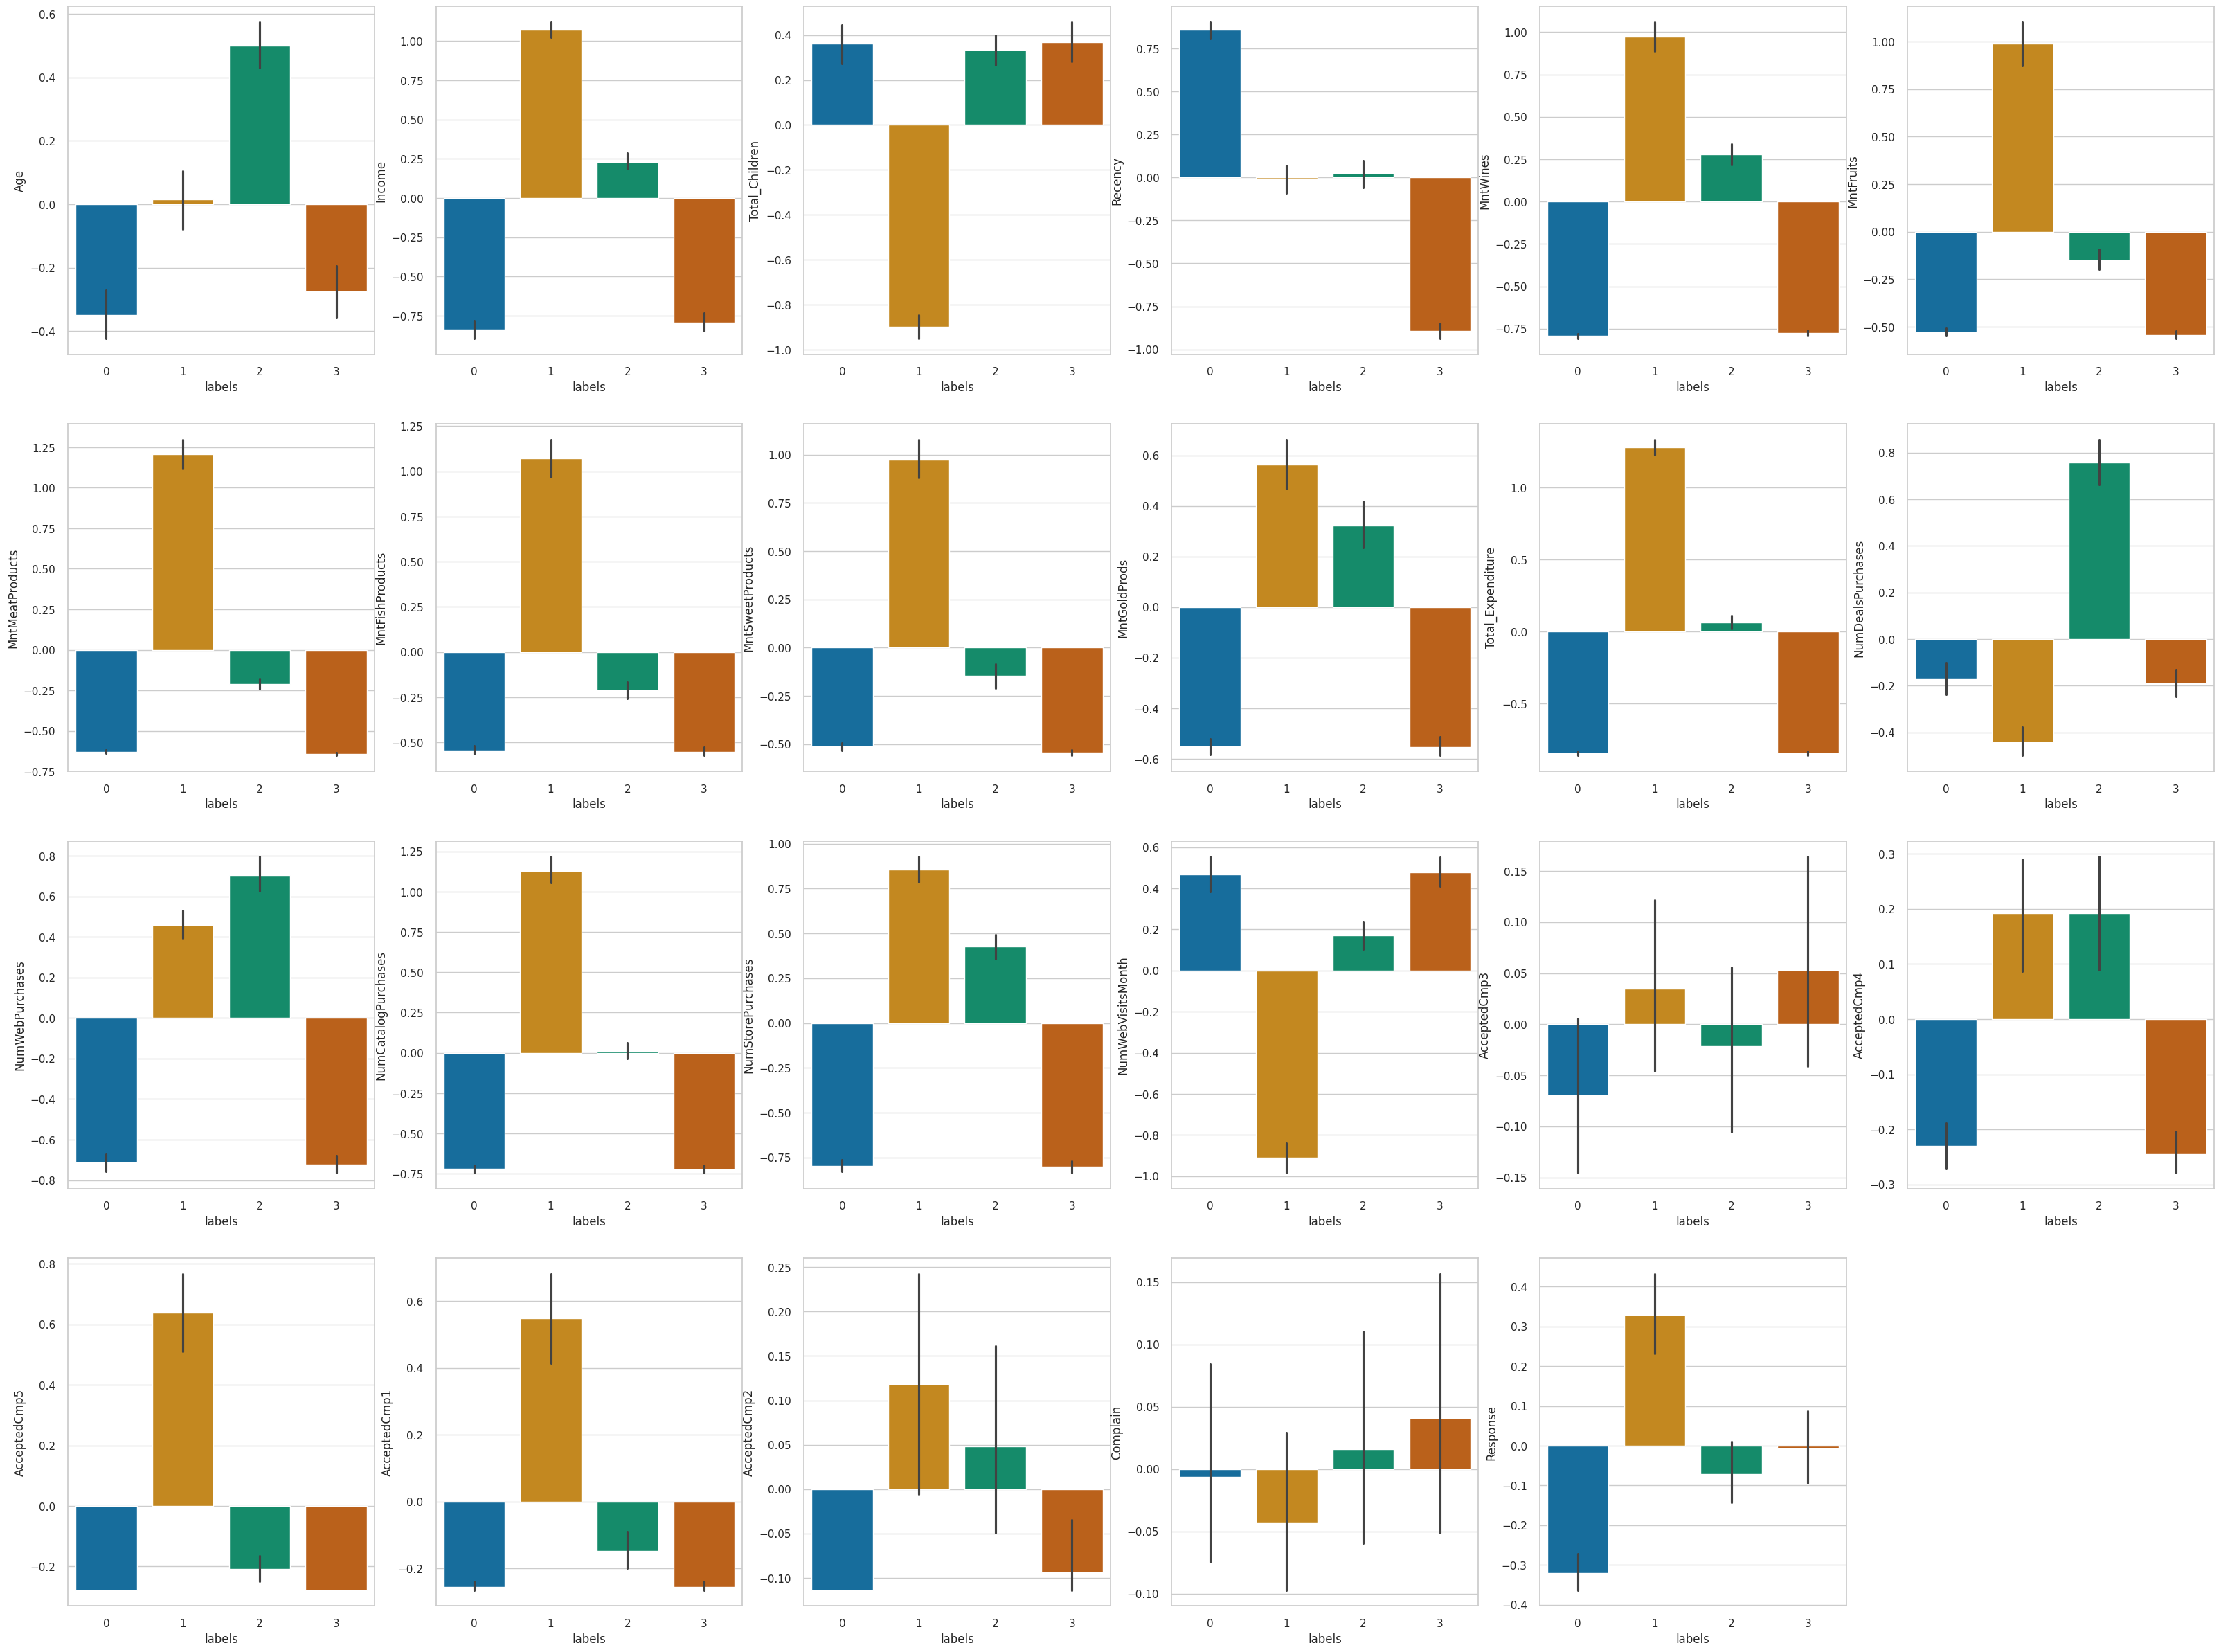

In [87]:
fig, ax = plt.subplots(4, 6, figsize=(40,30))

for i in range(4):
  for j in range(6):
    if 6*i+j < len(numeric_columns):
      sns.barplot(data=df_kmedoids, x='labels', y=numeric_columns[6*i+j], ax=ax[i,j], palette='colorblind')
    else:
      ax[i, j].axis('off')

##### **Observations:**

**Cluster 0:**

  * **AGE:** Youngest population.
  * **INCOME:** Lowest income.
  * **CHILDREN:** Children within the household unit could range from 0 to 1.
  * **RECENCY:** No recent purchases amongst this group.
  * **PURCHASES:** Low across all products.
  * **EXPENDITURE:** Lowest spenders.
  * **DEALS:** Below average (does not engage).
  * **WP (WEB PURCHASES) and MWV (WEB VISITS (PREVIOUS MONTH)):** MWV are high, but WP are low, showing a negative correlation between the two.
  * **STORE PURCHASES:** Low.
  * **CATALOGS:** Low.
  * **CAMPAIGNS:** Lowest across all campaigns.  
  * **COMPLAINTS:** Standard deviation spreads from below average to above, but ultimately no.
  * **RESPONSE:** No.

***CLUSTER 0 KEY INSIGHTS***

* *This population, being the youngest, could signify their current educational status (students or recent graduates). This is further strengthened by their low income and low expenditure (not in clover to buy). Along with the low income, this population could be losing interest in the company, as it shows a lack of engagement across several campaign categories. Catalogs are low, but MWV is high, which tells me that they are seeking deals, but mainly in a technological way.*

**Cluster 1:**

  * **AGE:** Average population with standard deviation spread out evenly.
  * **INCOME:** Highest earners.
  * **CHILDREN:** No children.
  * **RECENCY:** Average shoppers (stagnated population).
  * **PURCHASES:** Highest amongst all products.
  * **EXPENDITURE:** Highest Spenders.
  * **DEALS:** Lowest.
  * **WP (WEB PURCHASES) and MWV (WEB VISITS (PREVIOUS MONTH)):** Lowest MWV. However, it has an average MP.
  * **STORE PURCHASES:** Highest.
  * **CATALOGS:** Highest.
  * **CAMPAIGNS:** Healthy engagement across all campaigns, the highest being 1, 2, and 5.
  * **COMPLAINTS:** No.
  * **RESPONSE:** Yes.

***CLUSTER 1 KEY INSIGHTS***

* *This customer population earns a significant amount of income, which enables them to spend more freely and on premium products. However, their recent purchases show consistency but are stagnating, possibly due to a need to reengage this group. The low MWV and average MP could be due to familiarity with the company's products, and purchases are mainly made out of convenience. This population is an active group that engages well with the in-store environment rather than online, hinting at that they're mindful of the quality of the products (can gauge the quality of products online). This population has no complaints and responds greatly to campaigns. Very loyal customer base!*

**Cluster 2:**

  * **AGE:** Oldest population (seniors).
  * **INCOME:** Average income.
  * **CHILDREN:** Possibly a household unit of 0 to 1 children.
  * **RECENCY:** Most purchases are older, but there's an indication of some recent purchases (average).  
  * **PURCHASES:** Below average across several products, but average or slightly above average in two (wine (average) and gold products (above average)).
  * **EXPENDITURE:** Slightly above average.
  * **DEALS:** Highest.
  * **WP (WEB PURCHASES) and MWV (WEB VISITS (PREVIOUS MONTH)):** MWV are average, with MP being the highest.
  * **STORE PURCHASES:** Above average.
  * **CATALOGS:** Low average.
  * **CAMPAIGNS:** Overall average engagement with all campaigns, the highest being campaign 4 (amongst the other clusters as well).
  * **COMPLAINTS:** Average complaints.
  * **RESPONSE:** No.

***CLUSTER 2 KEY INSIGHTS***

* *This population consists of older customers who could be a mix of seniors or retirees. Their income is average (stable enough to have above-average expenditure). These customers are intentional about their spending and which products they spend it on, more so products that point towards leisure (wine) and quality (gold products). MP is highest possibly due to convenience due to their seniority, but enjoys in-person interaction from time to time. This population is a consistent group with no extremeties. Would be beneficial to continue engagement with these customers due to the stability of their behavior.*

**Cluster 3:**

  * **AGE:** This average population is more on the younger spectrum.
  * **INCOME:** Below average.
  * **CHILDREN:** The most children in their household unit.
  * **RECENCY:** Most recent purchases made within this group.
  * **PURCHASES:** Lowest amount of purchases across all products.
  * **EXPENDITURE:** Lowest.
  * **DEALS:** Below average.
  * **WP (WEB PURCHASES) and MWV (WEB VISITS (PREVIOUS MONTH)):** This population has the highest MWV but the lowest WP.
  * **STORE PURCHASES:** Lowest.
  * **CATALOGS:** Lowest.
  * **CAMPAIGNS:** Lowest across all campaigns except for campaign 3.
  * **COMPLAINTS:** Highest complaints.
  * **RESPONSE:** No.

***CLUSTER 3 KEY INSIGHTS***

* *This population of customers is slightly young (just below average) and earns an average income, but is more so on a tighter budget due to the household unit having the largest number of children present. This group's recent purchases are recent, but are limited to how much is spent and how frequently they are buying (could benefit from bulk sales), based on low expenditure and WP. Due to lower spending freedom, this group is less engaged in campaigns, deals, and catalogs. This population seems to be burdened financially, with very limited options and resources (in-store disengagement, but has very high MWV). This could be a group that is constantly in rotation based on the complaints, which might be based on unmet needs, but does not care to respond, and perhaps looks elsewhere(churn) while constantly on the lookout for possible discounts (high MWV).*


## **Business Recommedations**

#### **Question 12**: Based on the cluster insights, what business recommendations can be provided?

**CLUSTER 0 PROPOSALS**

*   Target this population through social media campaigns (more on-brand campaigns).
*   Offer discounts that tailors to young adults and students such as "BOGO" deals and student discounts.
* Introduce limited or timely deals to encourage online purchasing.

**CLUSTER 1 PROPOSALS**

* Offer exclusive programs, such as reward programs with exclusive gifts (gift cards).
* Implement upselling and cross-selling to encourage more premium purchases.
* Focus on more personalized campaigns.
* Offer special store services - "free delivery on purchases $x and above."

**CLUSTER 2 PROPOSALS**

* Offer senior discounts.
* Target campaigns for wine and gold products.
* Continue to encourage in-store and MWV by tettering between solely in-store discounts and online discounts.
* Implement mobile/landline engagement to consider this population's significant aging.

**CLUSTER 3 PROPOSALS**

* Offer bulk deals.
* Target campaigns for family-friendly products "Family Size";"x% more".
* Be more attentive to this populations complaints (limit dismissing needs and expectations - "how to better cater to this population without losses in revenue or high-risk offers for the already financially burdened population).
* Provide in-store workshops and multiplatform information on available resources for struggling families.





